<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz vorbereiten - Dummies, Skalen

Im ersten Schritt wird der Datensatz aus dem ersten Notebook unter dem Namen 'maindf' geladen. Hier muss der Datensatz "1_Cleansing_Join" aus dem vorherigen Notebook reingeladen werden.

In [ ]:
import pandas as pd
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/1_Cleansing_Join.csv')

Nach inhaltlicher Überlegung ist klar geworden, dass die Spalten 'arrival_date','departure_date', 'night_index' und 'arrival_date_week_number' für den Input von Klassifikationsmodellen irrelevant sind. Hiermit werden sie aus dem Dataframe gelöscht

In [ ]:
maindf = maindf.drop(columns=['arrival_date','departure_date', 'night_index', 'arrival_date_week_number'])

In [ ]:
maindf.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
city                              0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                

Im folgenden Schritt werden bereits alle binären Variablen auch zu solch einem Datentyp geändert.

In [ ]:
maindf['is_canceled'] = maindf['is_canceled'].astype('uint8')
maindf['is_repeated_guest'] = maindf['is_repeated_guest'].astype('uint8')
maindf['holiday_flag'] = maindf['holiday_flag'].astype('uint8')
maindf['agent'] = maindf['agent'].astype('uint8')


Nun müssen alle nicht ordinalen, kategoriellen Features zu dummy-Variablen umgebaut werden.

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['city']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.city, drop_first=True, prefix='city'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['distribution_channel']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.distribution_channel, drop_first=True, prefix='distribution_channel'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['deposit_type']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.deposit_type, drop_first=True, prefix='deposit_type'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [ ]:
maindf = pd.concat([
    maindf.drop(columns=['customer_type']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf.customer_type, drop_first=True, prefix='customer_type'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [ ]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0,737,2015,July,1,0,0,0,2,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0,7,2015,July,1,0,1,1,1,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0,13,2015,July,1,0,1,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,July,1,0,2,2,2,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111409,0,23,2017,August,30,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111410,0,102,2017,August,31,2,5,7,3,0.0,...,1,0,0,1,0,0,0,0,1,0
111411,0,34,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0
111412,0,109,2017,August,31,2,5,7,2,0.0,...,1,0,0,1,0,0,0,0,1,0


Das Feature country entpuppt sich als Problem, da hier über 175 dummy variablen gebildet werden würden

In [ ]:
len(maindf.country.value_counts())

176

Wir sehen aber bereits bei folgender Ansicht dass sich die meisten Buchungen höchstwahrscheinlich auf einige wenige Länder fokussieren werden.

In [ ]:
maindf.country.value_counts()

PRT    43547
GBR    11278
FRA    10179
ESP     8287
DEU     7171
       ...  
VGB        1
BDI        1
PLW        1
BHS        1
CYM        1
Name: country, Length: 176, dtype: int64

In [ ]:
maindf.groupby(['country']).sum()

<ipython-input-17-7a783e7a63f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  maindf.groupby(['country']).sum()


,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,city_Lisbon,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
country,,,,,,,,,,,,,,,,,,,,,
ABW,0,252,4033,32,2,5,7,5,0.0,0,...,2,0,0,2,0,0,0,0,2,0
AGO,205,8349,709705,5415,823,2086,2909,557,77.0,5,...,328,144,0,206,0,0,0,2,325,18
AIA,0,0,2016,8,2,2,4,2,2.0,0,...,1,0,0,1,0,0,0,0,1,0
ALB,2,811,20162,159,10,26,36,19,0.0,1,...,7,2,0,8,0,0,0,0,7,3
AND,5,329,14116,103,9,22,31,15,4.0,0,...,2,1,0,6,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,109,2016,5,1,2,3,2,0.0,0,...,1,0,0,1,0,0,0,0,1,0
VNM,2,673,16131,152,5,16,21,17,0.0,0,...,6,0,0,8,0,0,0,0,7,1
ZAF,30,5409,157283,1249,71,160,231,140,17.0,0,...,60,15,0,63,0,0,0,1,70,7


Hier dann noch mal eine Ansicht aller Länder mit ihrer dazugehörigen Anzahl an Buchungen. Wir sehen dass relativ schnell schon keine vierstelligen Buchungsanzahlen mehr vorhanden sind. Aufgrundessen werden alle Länder aus dem Datensatz geworfen die n<1000 Buchungen aufweisen. Dieser modifizierte Dataframe wird maindf_c genannt

In [ ]:
country_counts = maindf['country'].value_counts()
country_names = country_counts.index.tolist()
counts = country_counts.tolist()

result = list(zip(country_names, counts))
print(result)

[('PRT', 43547), ('GBR', 11278), ('FRA', 10179), ('ESP', 8287), ('DEU', 7171), ('ITA', 3635), ('IRL', 3327), ('BEL', 2248), ('BRA', 2187), ('USA', 2048), ('NLD', 2020), ('CHE', 1703), ('CN', 1269), ('AUT', 1190), ('SWE', 1004), ('CHN', 981), ('POL', 884), ('ISR', 667), ('NOR', 593), ('RUS', 577), ('ROU', 494), ('FIN', 436), ('DNK', 421), ('AUS', 418), ('AGO', 352), ('LUX', 284), ('MAR', 237), ('TUR', 230), ('HUN', 229), ('ARG', 207), ('JPN', 187), ('CZE', 158), ('IND', 146), ('KOR', 128), ('GRC', 110), ('SRB', 100), ('DZA', 97), ('HRV', 88), ('IRN', 81), ('MEX', 80), ('EST', 79), ('ZAF', 78), ('LTU', 75), ('BGR', 74), ('NZL', 72), ('COL', 69), ('UKR', 68), ('MOZ', 66), ('CHL', 63), ('SVK', 61), ('THA', 59), ('ISL', 56), ('LVA', 53), ('SVN', 52), ('ARE', 50), ('TWN', 49), ('SAU', 48), ('PHL', 40), ('CYP', 40), ('TUN', 38), ('SGP', 38), ('IDN', 35), ('NGA', 33), ('EGY', 32), ('LBN', 30), ('HKG', 29), ('PER', 28), ('MYS', 28), ('URY', 27), ('ECU', 27), ('BLR', 26), ('CPV', 24), ('VEN', 24

In [ ]:
keep_countries = ['PRT', 'GBR', 'Fra', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'SWE']
maindf_c = maindf[maindf['country'].isin(keep_countries)]

Mit folgenden 2 Zeilen sehen wir, dass gut 20000 Einträge durch diesen Schritt verloren gehen. Anschließend können jedoch Dummies gebildet werden und es sind anstatt 175 nur noch 14

In [ ]:
len(maindf)

111414

In [ ]:
len(maindf_c)

90914

In [ ]:
maindf_c = pd.concat([
    maindf_c.drop(columns=['country']), # remove the columns we one-hot-encode
    pd.get_dummies(maindf_c.country, drop_first=True, prefix='country'),
], axis=1) # join the one-hot-encoded columns by concatenating them side-by-side (axis 1)

In [ ]:
maindf_c.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
total_of_special_requests         0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                      0
holiday_flag                      0
city_Lisbon                       0
distribution_channel_Direct       0
distribution_channel_GDS          0
distribution_channel_TA/TO  

In [ ]:
maindf_c

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
0,0,342,2015,July,1,0,0,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,2015,July,1,0,0,0,2,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,2015,July,1,0,1,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,July,1,0,1,1,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,July,1,0,2,2,2,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111408,0,21,2017,August,30,2,5,7,2,0.0,...,0,0,0,0,0,0,0,0,0,0
111409,0,23,2017,August,30,2,5,7,2,0.0,...,0,0,0,0,0,0,0,0,0,0
111411,0,34,2017,August,31,2,5,7,2,0.0,...,0,1,0,0,0,0,0,0,0,0
111412,0,109,2017,August,31,2,5,7,2,0.0,...,0,0,0,1,0,0,0,0,0,0


Da der 'arrival_date_month' noch in einem String vorliegt, werden die Werte nun durch die Monatszahlen ausgetauscht um eine bessere Verarbeitung durch das spätere Modell zu gewährleisten.

In [ ]:
arrival_date_month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
maindf_c.arrival_date_month = maindf_c.arrival_date_month.apply(lambda x: arrival_date_month_mapping[x])

wir sehen dass alle features in dem gewünschten Datenformat vorliegen, nur children erklärt sich uns nicht ganz.

In [ ]:
maindf_c.dtypes

is_canceled                         uint8
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
stay_nights_sum                     int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   uint8
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                               uint8
days_in_waiting_list                int64
adr                               float64
total_of_special_requests           int64
average_temperature               float64
average_temp_min                  float64
average_temp_max                  float64
average_prcp                      float64
holiday_flag                      

Da, wie hier zu sehen lediglich integer-Werte in der 'children' Spalte vorhanden sind, wird das Datenformat auch zu diesem geändert.

In [ ]:
maindf_c.children.value_counts()

0.0     84487
1.0      3645
2.0      2732
3.0        49
10.0        1
Name: children, dtype: int64

In [ ]:
maindf_c['children'] = maindf_c['children'].astype('int64')


Zudem werden zwei dummies umbenannt, damit später keine Probleme durch dessen Namen aufkommen. Bei beiden sind Satzzeichen vorhanden, mit denen Python in gewissen Codeausführungen nicht umgehen kann. Es wird das Leerzeichen, sowie das slash zu einem Unterstrich geändert. Somit haben wir bei allen features einen zusammenhängenden string.

In [ ]:
maindf_c= maindf_c.rename(columns={'deposit_type_Non Refund': 'deposit_type_Non_Refund'})


In [ ]:
maindf_c= maindf_c.rename(columns={'distribution_channel_TA/TO': 'distribution_channel_TA_TO'})


In [ ]:
maindf_c.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stay_nights_sum                   0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
days_in_waiting_list              0
adr                               0
total_of_special_requests         0
average_temperature               0
average_temp_min                  0
average_temp_max                  0
average_prcp                      0
holiday_flag                      0
city_Lisbon                       0
distribution_channel_Direct       0
distribution_channel_GDS          0
distribution_channel_TA_TO  

Wenn wir uns die durchschnittlichen Features, gruppiert nach den Ausprägungen unserer Zielvariablen anschauen, kann man schon erste kleine Ableitungen erkennen. Beispielsweise ist im Schnitt die Leadtime deutlich höher bei den Buchungen, welche gecancelt werden.

In [ ]:
maindf_c.groupby('is_canceled').mean()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stay_nights_sum,adults,children,babies,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,85.618231,2016.131418,6.565634,15.952558,0.970159,2.532400,3.502559,1.871863,0.106375,0.011528,...,0.019026,0.111586,0.114660,0.167201,0.046768,0.043206,0.030647,0.322462,0.014564,0.028998
1,154.392387,2016.127060,6.699561,15.688007,0.907866,2.527086,3.434953,1.909251,0.095594,0.004020,...,0.006762,0.032424,0.057767,0.062771,0.022148,0.035405,0.010249,0.701291,0.006043,0.013337


Um Multikollinearität ausschließen zu können wird der VIF-Faktor für die Features berechnet.

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for regression model using 'rating' as response variable
yy, XX = dmatrices('is_canceled ~ lead_time+arrival_date_year+arrival_date_month+arrival_date_day_of_month+stays_in_weekend_nights+stays_in_week_nights+stay_nights_sum+adults+children+babies+is_repeated_guest+previous_cancellations+previous_bookings_not_canceled+booking_changes+agent+days_in_waiting_list+adr+total_of_special_requests+average_temperature+average_temp_min+average_temp_max+average_prcp+holiday_flag+city_Lisbon+distribution_channel_Direct+distribution_channel_GDS+distribution_channel_TA_TO+distribution_channel_Undefined+deposit_type_Non_Refund+deposit_type_Refundable+customer_type_Group+customer_type_Transient+customer_type_Transient-Party+country_BEL+country_BRA+country_CHE+country_CN+country_DEU+country_ESP+country_GBR+country_IRL+country_ITA+country_NLD+country_PRT+country_SWE+country_USA', data=maindf_c, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = XX.columns

#calculate VIF for each predictor variable
vif_df['VIF'] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]

#view VIF for each predictor variable
print(vif_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          variable           VIF
0                        Intercept  1.435203e+07
1                        lead_time  1.695892e+00
2                arrival_date_year  1.806875e+00
3               arrival_date_month  1.767246e+00
4        arrival_date_day_of_month  1.020880e+00
5          stays_in_weekend_nights           inf
6             stays_in_week_nights           inf
7                  stay_nights_sum           inf
8                           adults  1.103958e+00
9                         children  1.145184e+00
10                          babies  1.024268e+00
11               is_repeated_guest  1.297380e+00
12          previous_cancellations  1.069021e+00
13  previous_bookings_not_canceled  1.274397e+00
14                 booking_changes  1.056065e+00
15                           agent  1.546678e+00
16            days_in_waiting_list  1.058926e+00
17                             adr  1.640237e+00
18       total_of_special_requests  1.200582e+00
19             avera

# Prüfung auf Multikollinearität

Nun wird der VIF-Wert in ein anderes Format gebracht, um eine einfachere Interpretation zu gewährleisten. Vor allem die Features, welche die Temperatur abbilden zeigen einen extrem hohen VIF-Wert, was auch vollkommen logisch ist. Sie sind stark voneinander abhängig. Darum wird entschieden für die Temperatur lediglich die 'average_temperature' zu behalten.

In [ ]:
# Funktion zur Formatierung der Zahlen
def format_number(num):
    return "{:.8f}".format(num)

# Anwendung der Funktion auf die Spalte 'Zahlen'
vif_df['VIF'] = vif_df['VIF'].apply(format_number)

# Ausgabe des formatierten DataFrames
print(vif_df)

                          variable                VIF
0                        Intercept  14352030.71952586
1                        lead_time         1.69589182
2                arrival_date_year         1.80687467
3               arrival_date_month         1.76724591
4        arrival_date_day_of_month         1.02087955
5          stays_in_weekend_nights                inf
6             stays_in_week_nights                inf
7                  stay_nights_sum                inf
8                           adults         1.10395792
9                         children         1.14518426
10                          babies         1.02426769
11               is_repeated_guest         1.29737999
12          previous_cancellations         1.06902097
13  previous_bookings_not_canceled         1.27439744
14                 booking_changes         1.05606513
15                           agent         1.54667751
16            days_in_waiting_list         1.05892577
17                          

In [ ]:
maindf_c = maindf_c.drop(columns=['average_temp_min', 'average_temp_max'])

In [ ]:
maindf_c = maindf_c.drop(columns=['stays_in_week_nights', 'stays_in_weekend_nights'])

Hier wird der vorbereitete Datensatz als csv-Datei heruntergeladen, damit im nächsten Notebook für die Regression darauf zurückgegriffen werden kann.

In [ ]:
maindf_c.to_csv('2_Data_for_Modeltraining.csv', header=True, index=False)

# Skalieren und Explorieren des Datensatzes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
maindf_scaled = maindf_c.copy()
columns_to_scale = list(set(maindf_c.columns) - {'is_canceled'}) # take all columns except Loan_Status_Y
maindf_scaled[columns_to_scale] = scaler.fit_transform(maindf_c[columns_to_scale])

In [ ]:
encoded_columns = ['is_canceled','arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'agent', 'is_repeated_guest', 'holiday_flag', 'city_Lisbon', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'distribution_channel_TA_TO', 'deposit_type_Non_Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party',
       'country_BEL', 'country_BRA', 'country_CHE', 'country_CN', 'country_DEU', 'country_ESP', 'country_GBR', 'country_IRL', 'country_ITA', 'country_NLD', 'country_PRT', 'country_SWE', 'country_USA']
numerical_columns = list(set(maindf_c.columns) - set(encoded_columns))

<ipython-input-40-cb9a405dbdb1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure() # required if we want to plot multiple figures from the same cell


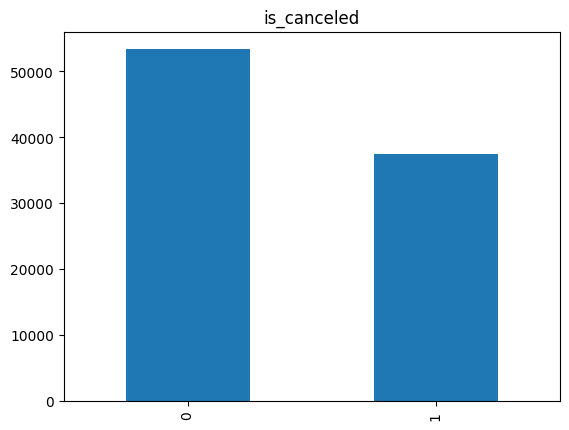

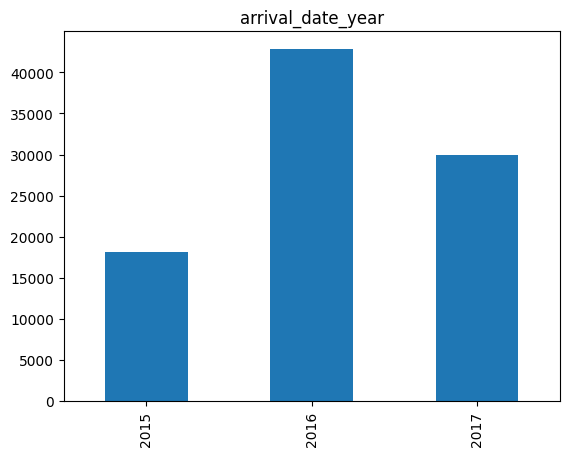

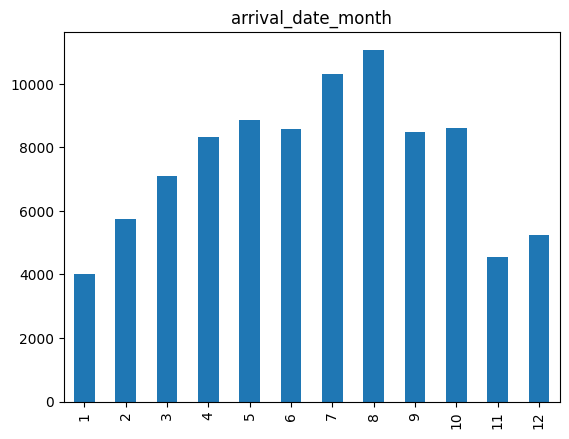

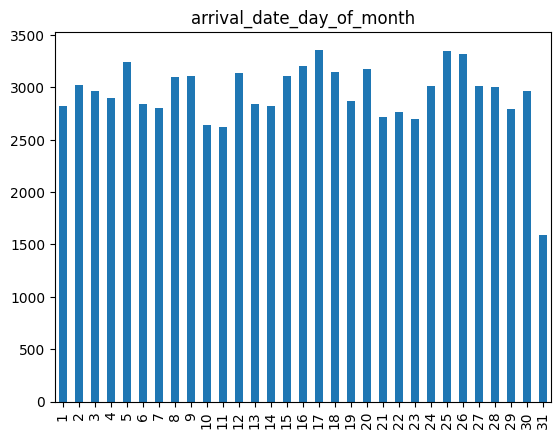

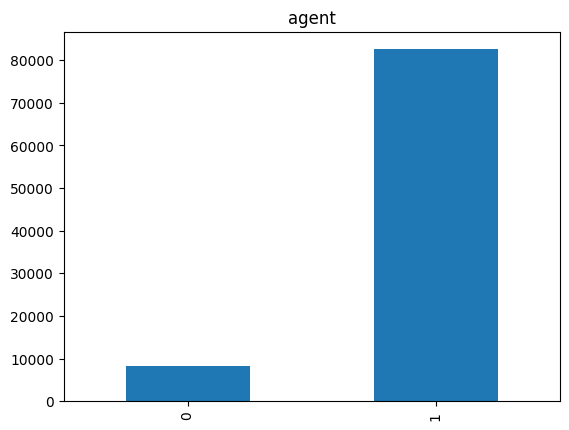

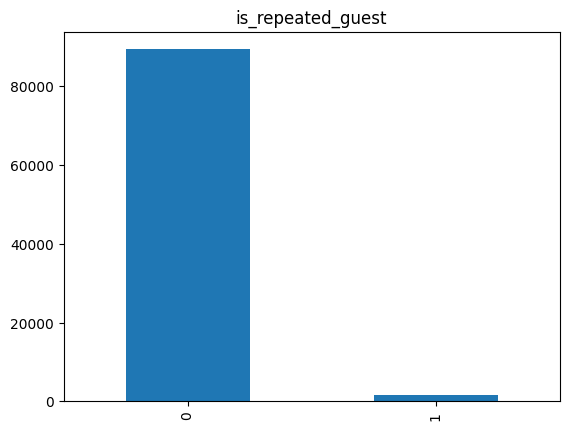

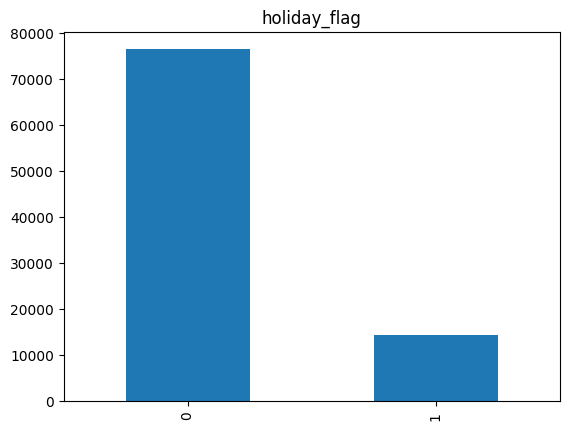

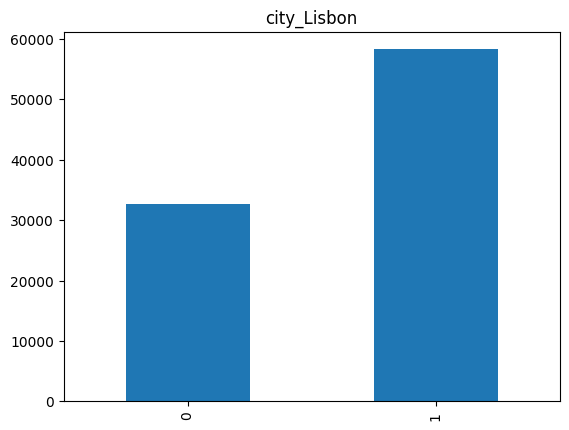

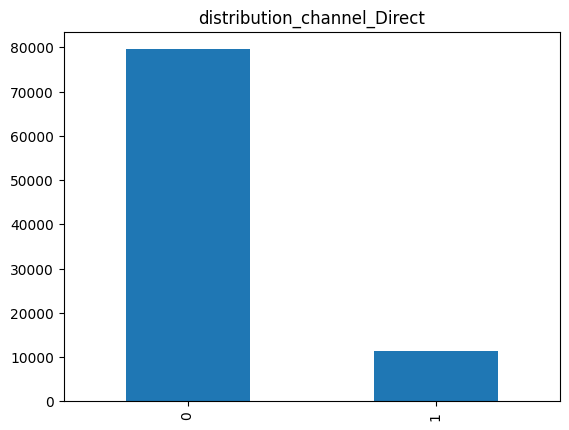

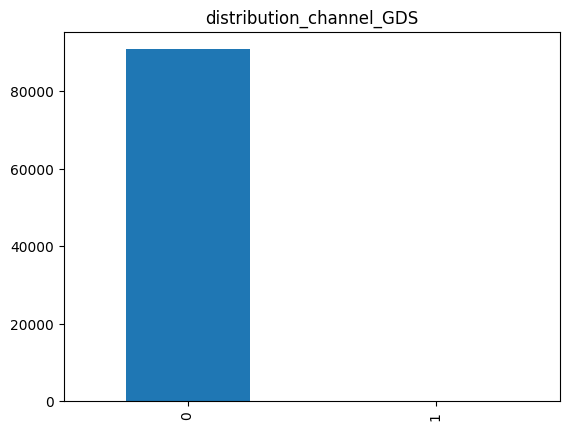

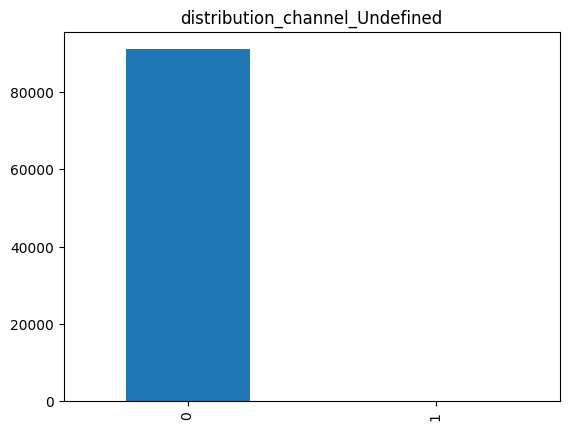

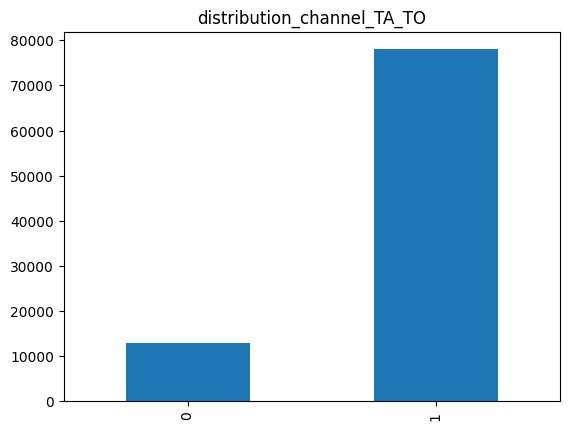

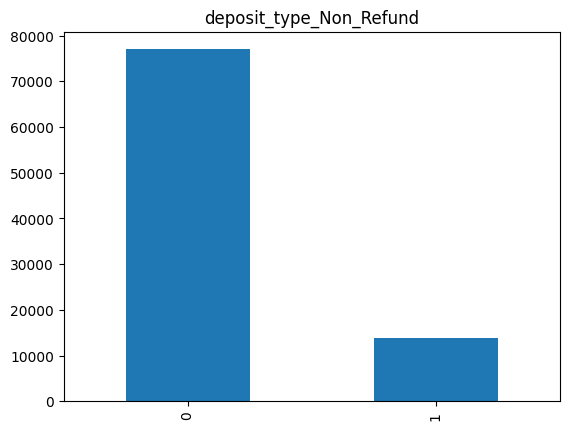

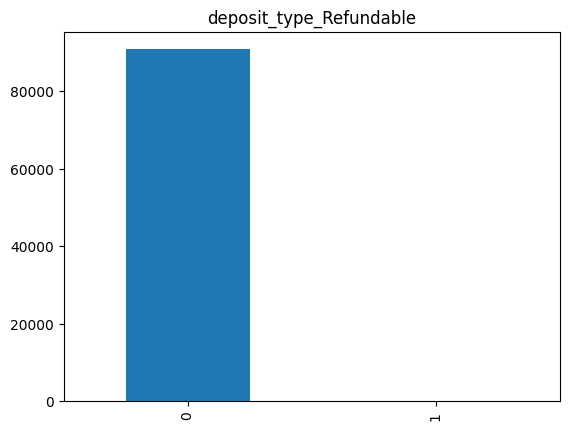

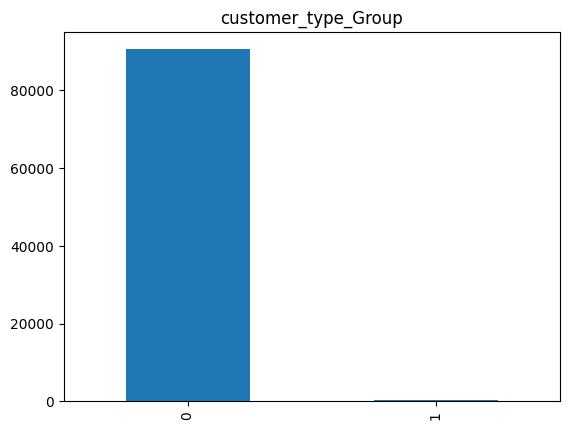

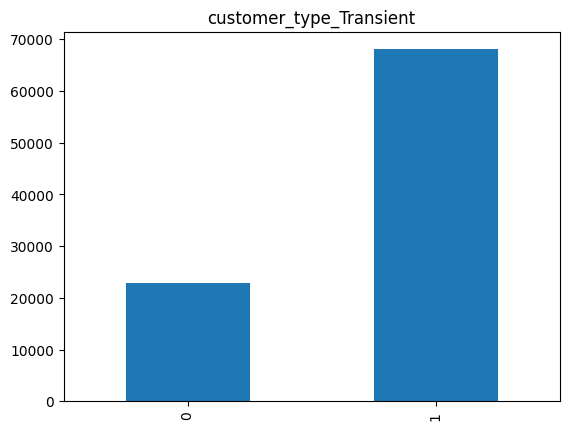

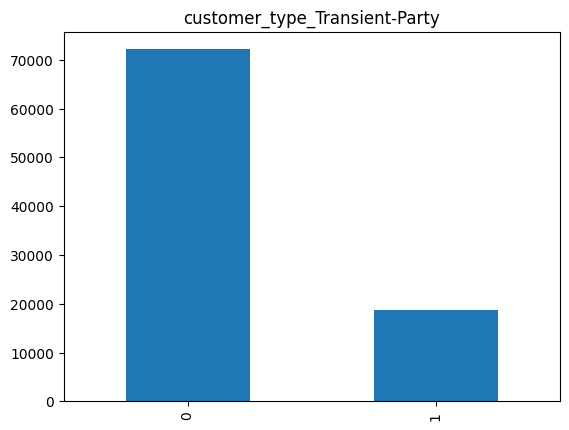

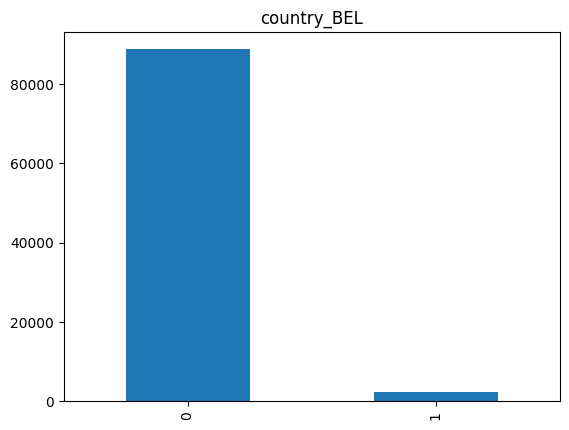

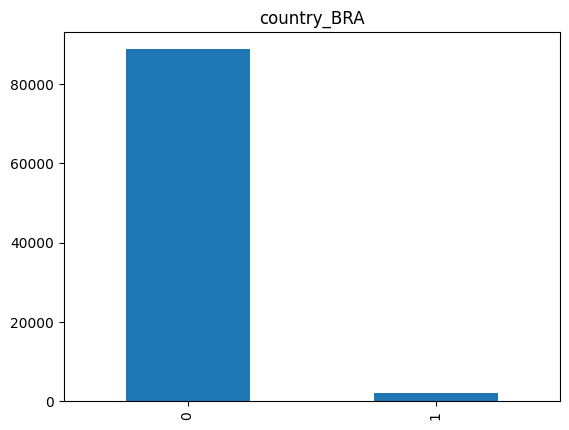

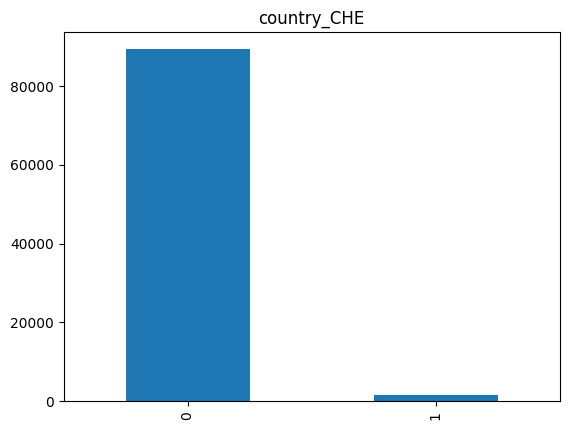

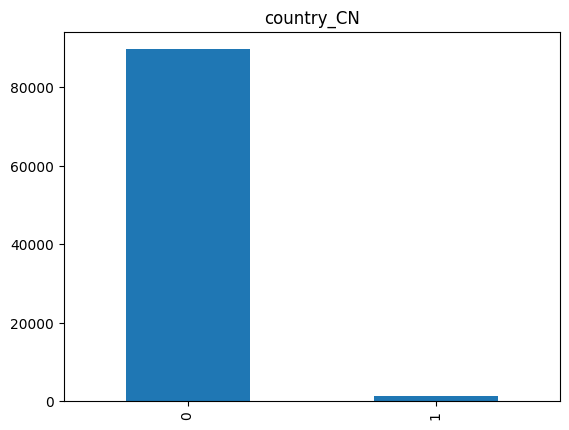

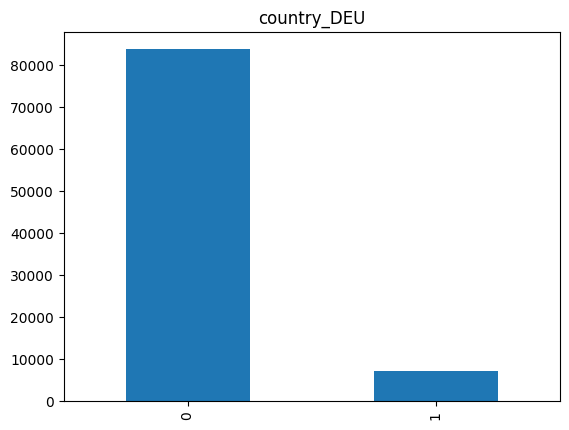

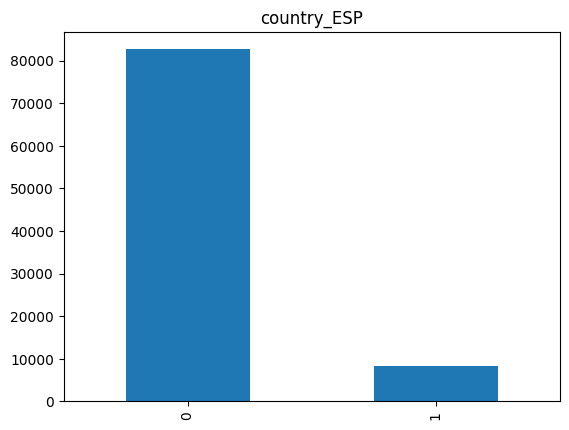

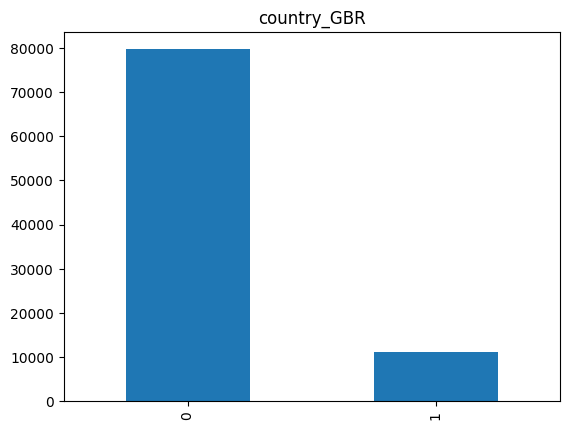

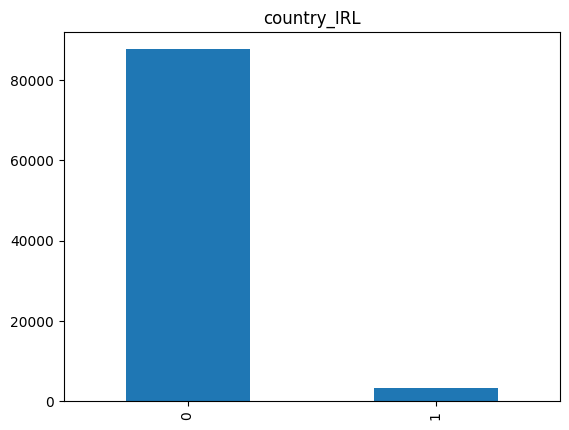

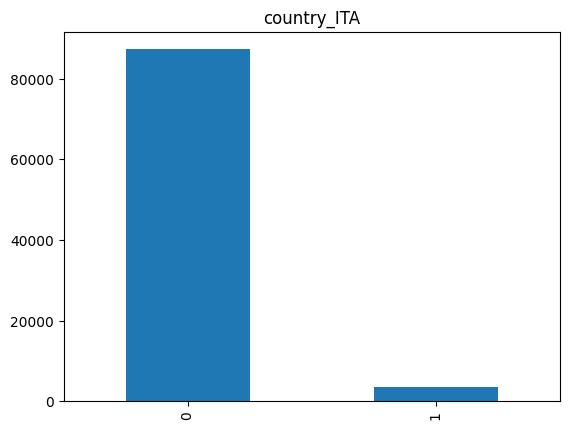

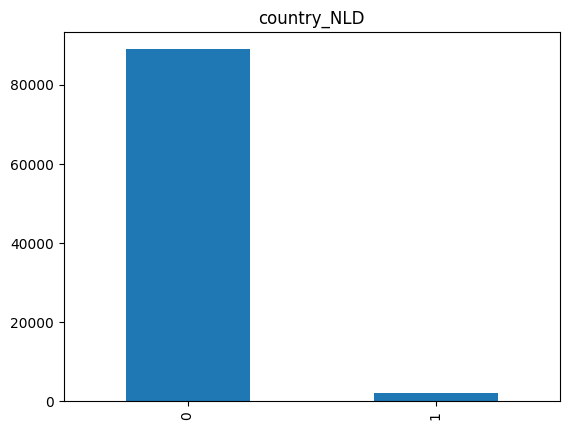

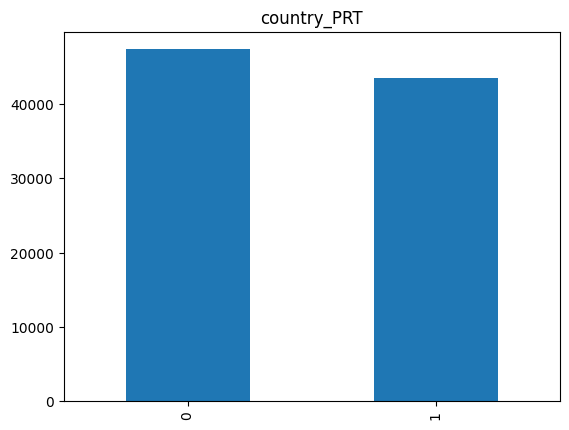

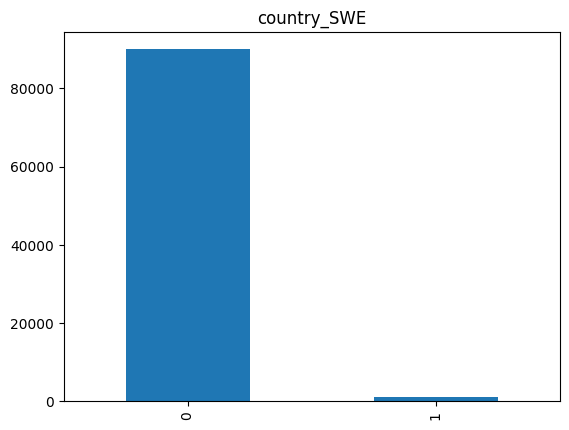

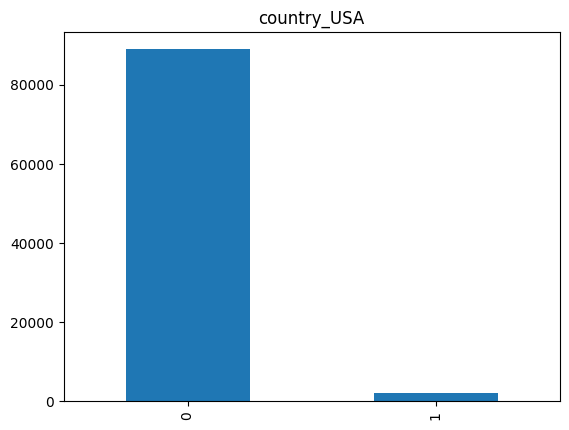

In [ ]:
import matplotlib.pyplot as plt
for column in encoded_columns:
  fig = plt.figure() # required if we want to plot multiple figures from the same cell
  maindf_c[column].value_counts(sort=False).sort_index().plot(kind='bar', title=column)

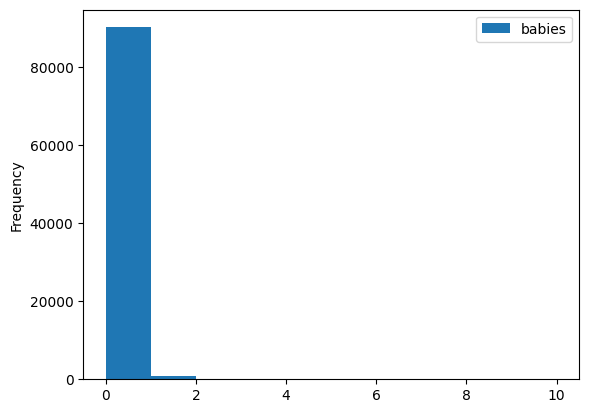

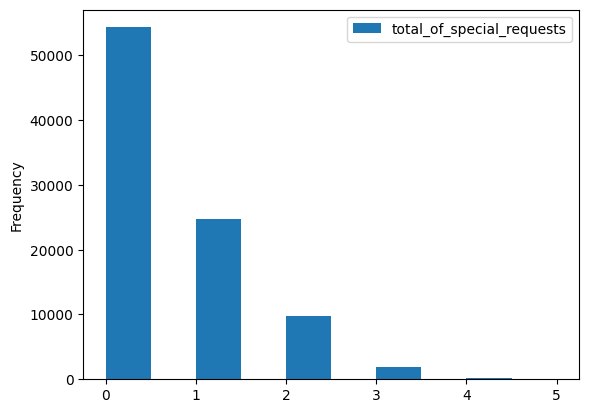

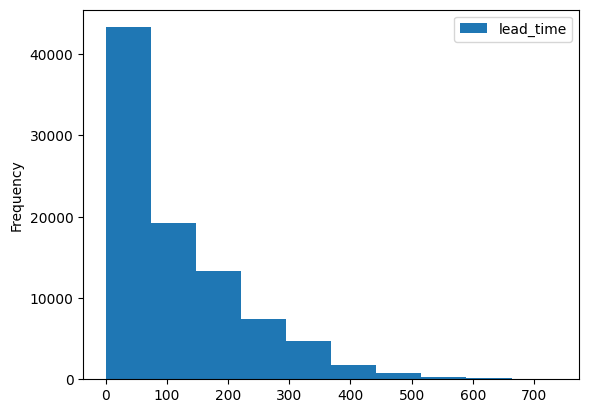

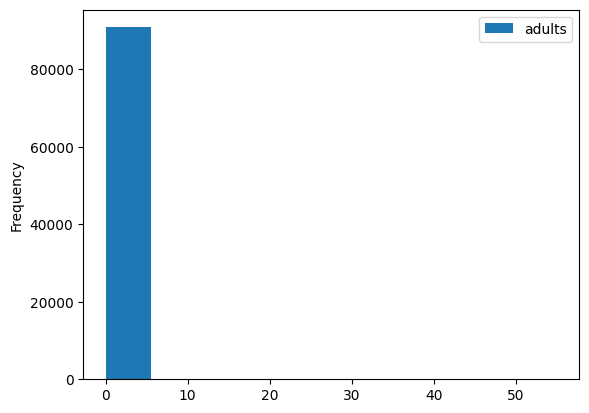

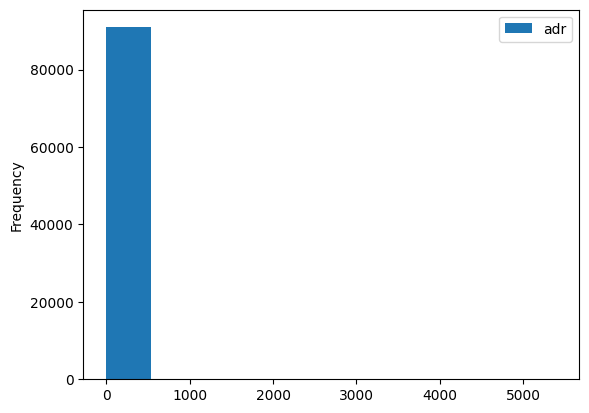

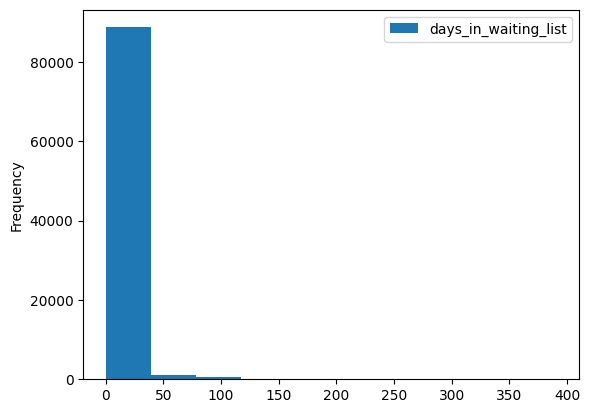

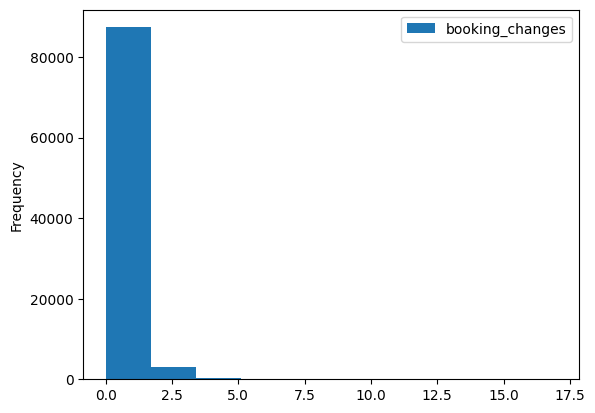

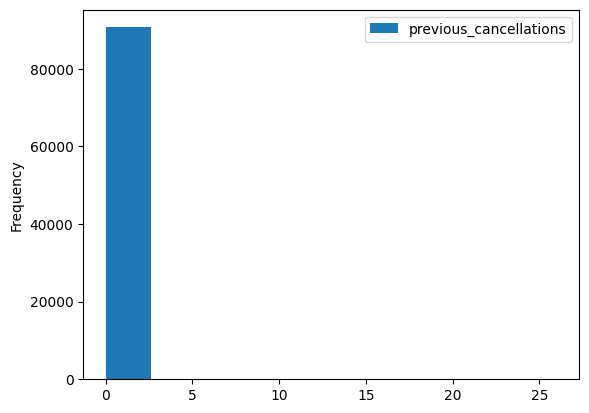

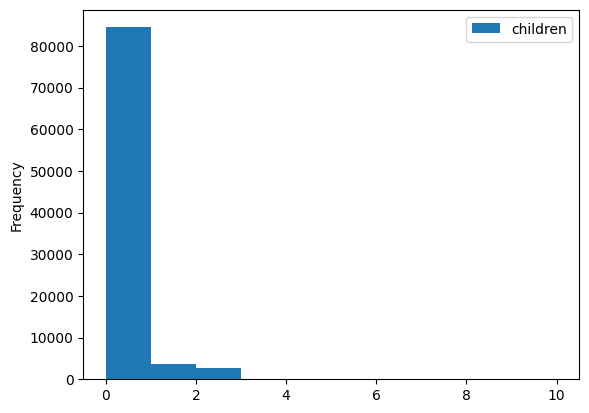

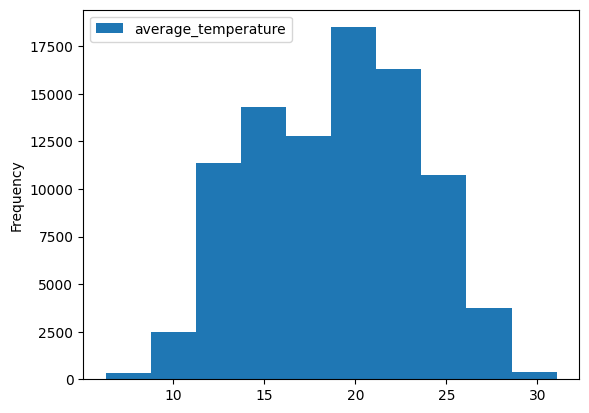

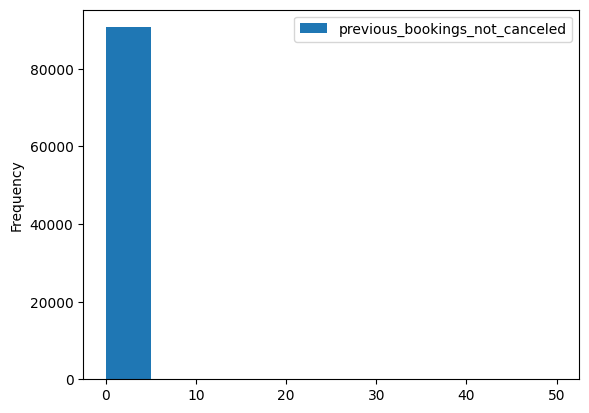

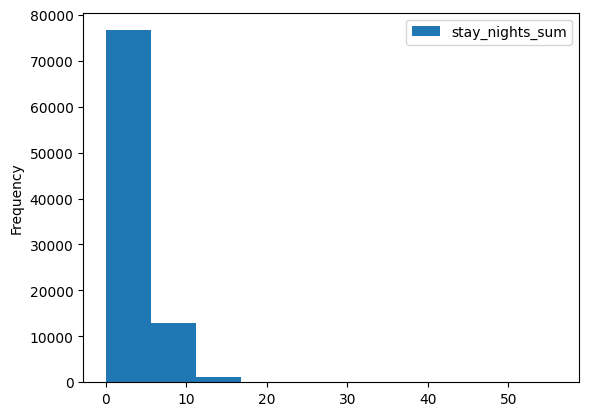

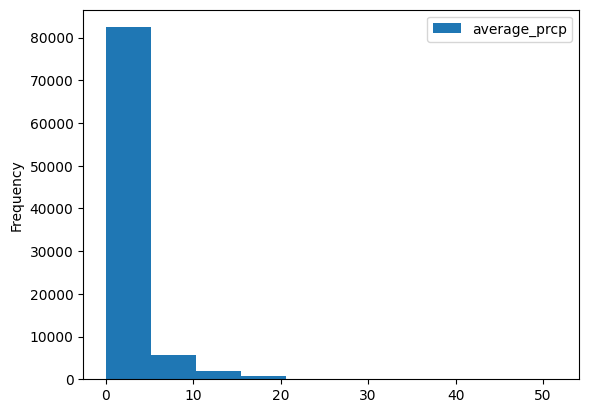

In [ ]:
for column in numerical_columns:
  maindf_c.plot(kind='hist', y=column)

<Axes: >

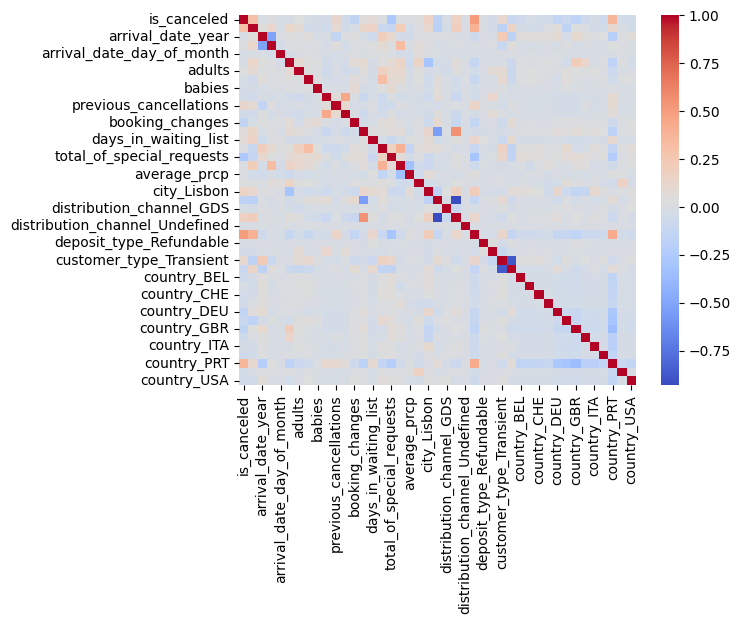

In [ ]:
import seaborn as sns
# .corr() calculates the correlation between each column in our dataframe
sns.heatmap(maindf_c.corr(), annot=False, cmap='coolwarm')

In [ ]:
X = maindf_c.drop(columns='is_canceled')
y = maindf_c.is_canceled

In [ ]:
X_scaled = maindf_scaled.drop(columns='is_canceled')
y_scaled = maindf_scaled.is_canceled

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y, shuffle = True)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, stratify = y_scaled, shuffle = True)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_scaled_smote, y_scaled_smote = smote.fit_resample(X_train_scaled,y_train_scaled)

In [ ]:
columns = X_train.columns

X_scaled_smote = pd.DataFrame(data=X_scaled_smote, columns=columns)
y_scaled_smote = pd.DataFrame(data=y_scaled_smote, columns=['is_canceled'])

print("length of oversampled data is ",len(X_scaled_smote))
print("Number of no cancellation in oversampled data",len(y_scaled_smote[y_scaled_smote['is_canceled']==0]))
print("Number of cancellation",len(y_scaled_smote[y_scaled_smote['is_canceled']==1]))

length of oversampled data is  85358
Number of no cancellation in oversampled data 42679
Number of cancellation 42679


In [ ]:
from sklearn.metrics import classification_report
def evaluate(clf, X_test_scaled, y_true):
  y_pred = clf.predict(X_test_scaled)
  print(classification_report(y_true, y_pred))

# Regressionsmodelle

## Logistische Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state=56)

In [ ]:
logistic.fit(X_scaled_smote, y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=56)

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logistic)#, n_features_to_select=10)

rfe.fit(X_scaled_smote, y_scaled_smote)


selected_features = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

                           Feature  Selected  Ranking
0                        lead_time      True        1
1                arrival_date_year      True        1
2               arrival_date_month      True        1
3        arrival_date_day_of_month     False       17
4                  stay_nights_sum      True        1
5                           adults      True        1
6                         children     False        8
7                           babies     False       19
8                is_repeated_guest      True        1
9           previous_cancellations      True        1
10  previous_bookings_not_canceled      True        1
11                 booking_changes      True        1
12                           agent     False       11
13            days_in_waiting_list     False        9
14                             adr      True        1
15       total_of_special_requests      True        1
16             average_temperature      True        1
17                    averag

In [ ]:
ranking = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Ranking': rfe.ranking_})
ranking = ranking.sort_values('Ranking')
print(ranking)

                           Feature  Ranking
0                        lead_time        1
39                     country_PRT        1
37                     country_ITA        1
34                     country_ESP        1
33                     country_DEU        1
30                     country_BRA        1
27         customer_type_Transient        1
24         deposit_type_Non_Refund        1
19                     city_Lisbon        1
16             average_temperature        1
15       total_of_special_requests        1
14                             adr        1
20     distribution_channel_Direct        1
11                 booking_changes        1
10  previous_bookings_not_canceled        1
9           previous_cancellations        1
1                arrival_date_year        1
8                is_repeated_guest        1
2               arrival_date_month        1
4                  stay_nights_sum        1
5                           adults        1
28   customer_type_Transient-Par

In [ ]:
evaluate(logistic, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10670
           1       0.77      0.71      0.74      7513

    accuracy                           0.79     18183
   macro avg       0.79      0.78      0.78     18183
weighted avg       0.79      0.79      0.79     18183



In [ ]:
logistic.score(X_test_scaled, y_test_scaled)

0.7922785018973767

### Explorieren der Predictions

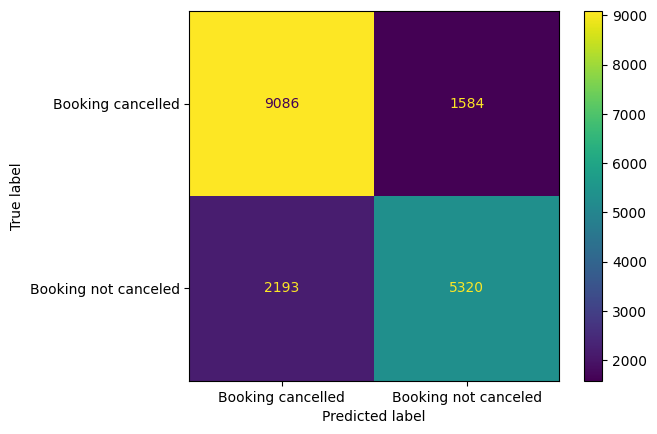

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    logistic, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

In [ ]:
predictions = logistic.predict(X_test_scaled)
df_with_predictions = pd.concat([X_test, y_test], axis='columns')
df_with_predictions = pd.concat([df_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=df_with_predictions.index)], axis=1)

In [ ]:
misclassified_df = df_with_predictions[df_with_predictions.is_canceled != df_with_predictions.Prediction]

In [ ]:
misclassified_df

,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,previous_cancellations,...,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA,is_canceled,Prediction
26382,255,2016,10,16,7,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
58264,20,2017,1,13,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
110600,207,2017,8,12,10,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59602,28,2017,2,26,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
90622,8,2016,9,15,1,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,18,2016,3,22,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
33744,0,2017,6,15,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
105806,82,2017,6,4,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4076,33,2016,3,1,8,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


<ipython-input-61-264e689d0138>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


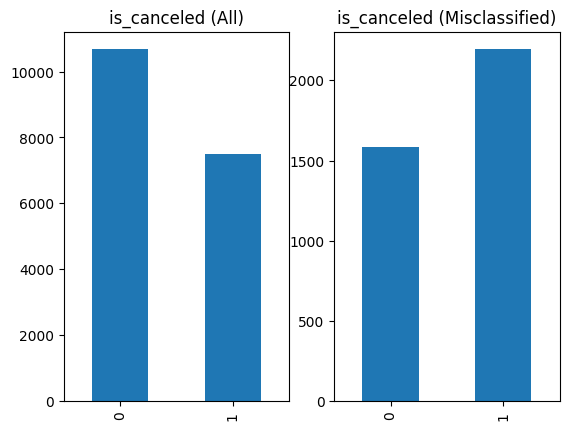

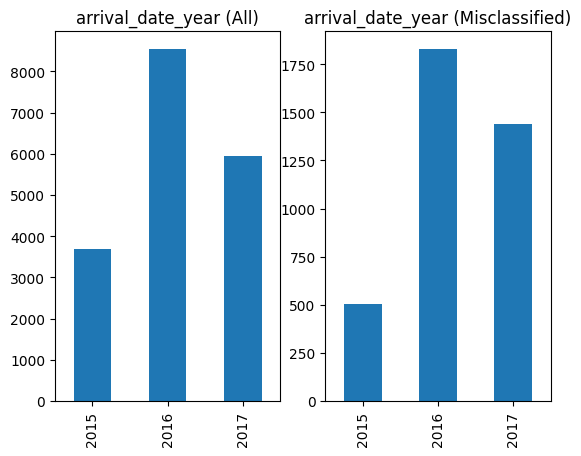

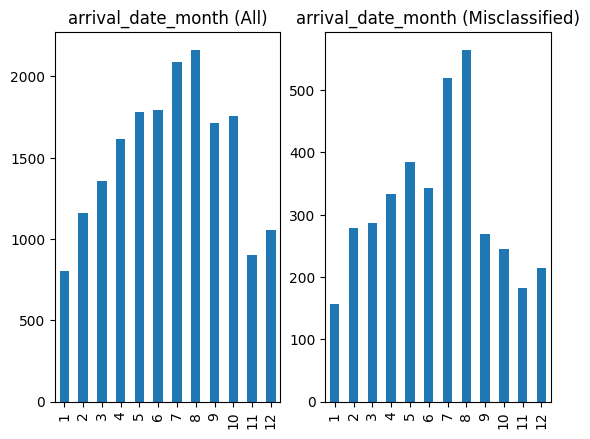

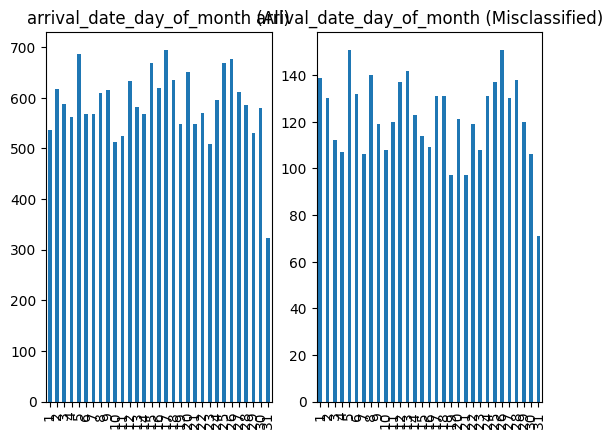

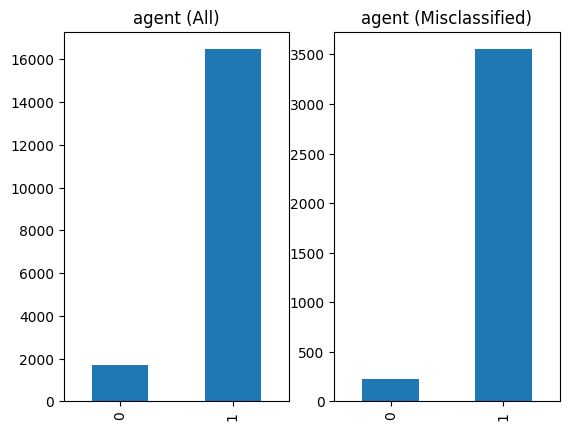

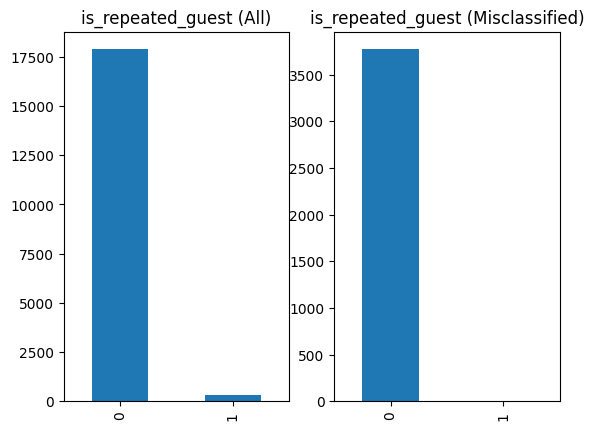

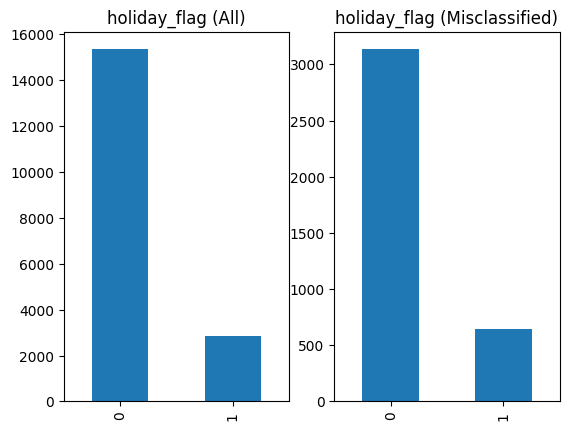

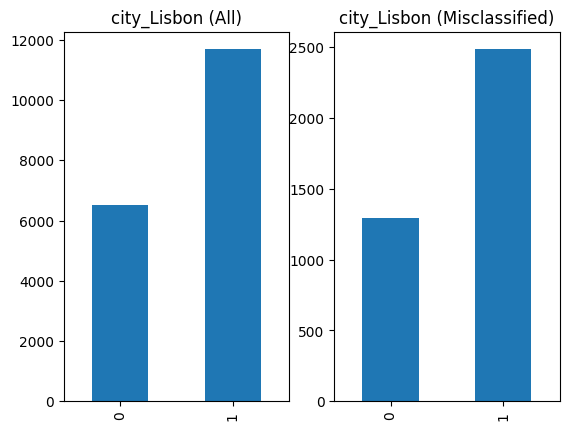

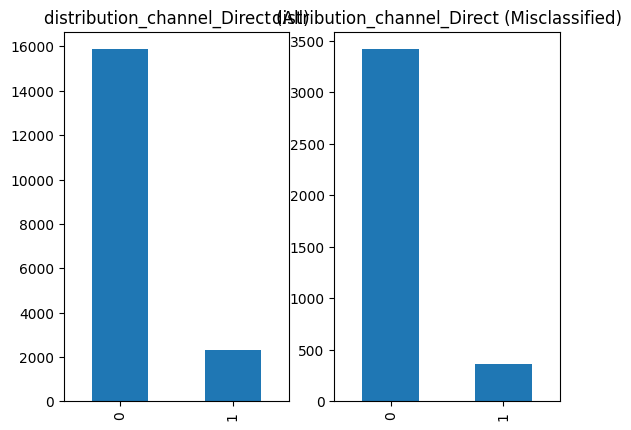

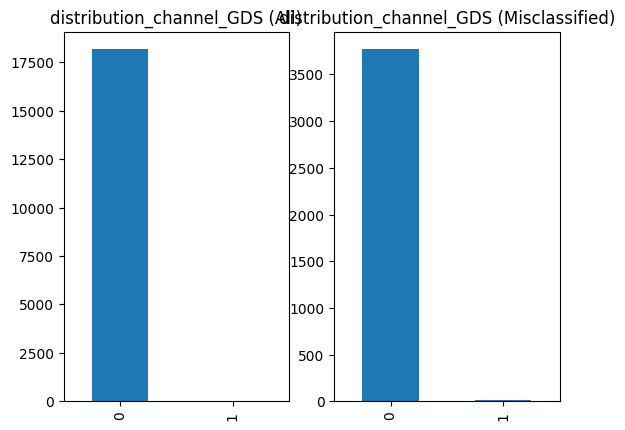

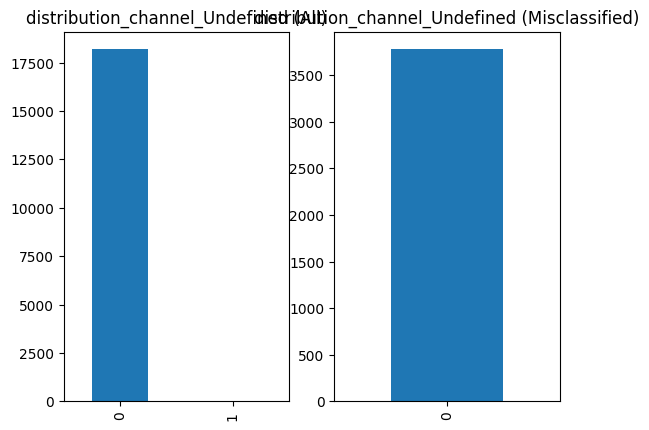

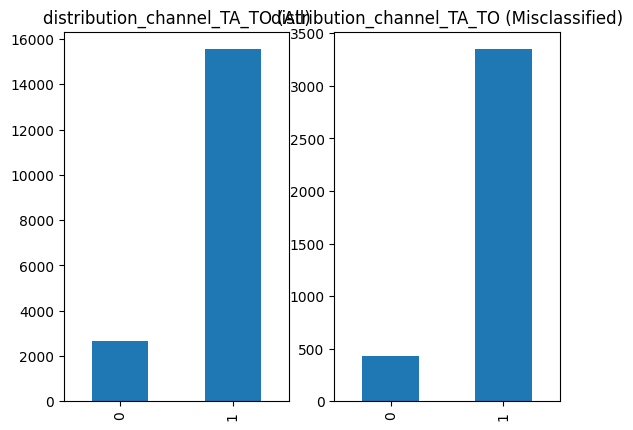

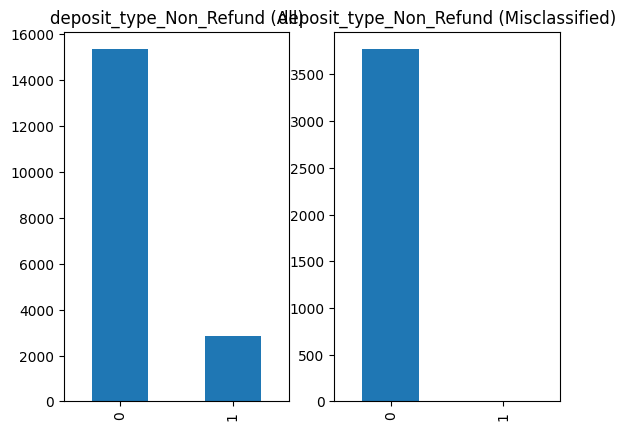

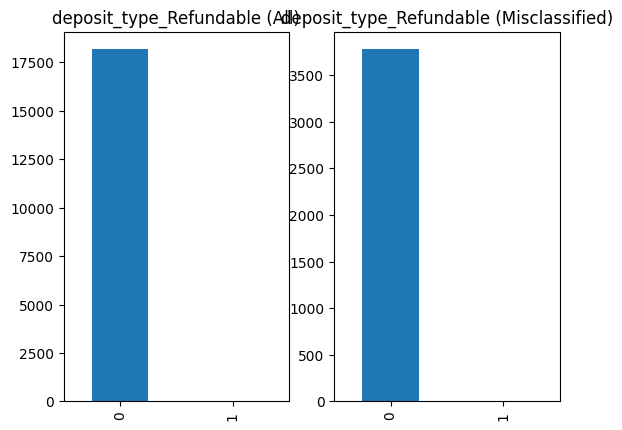

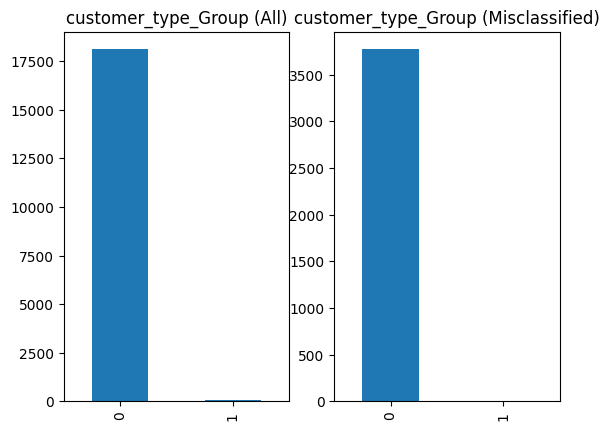

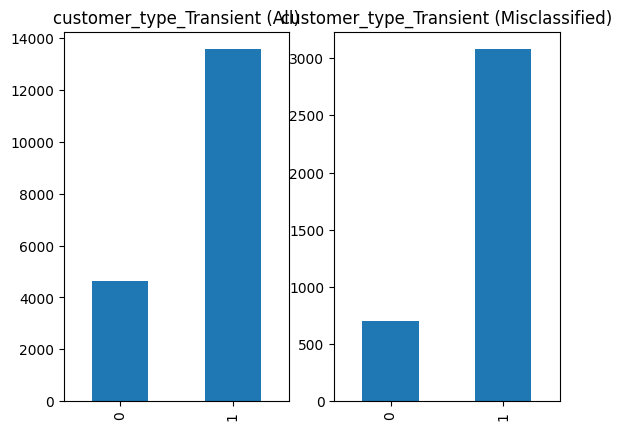

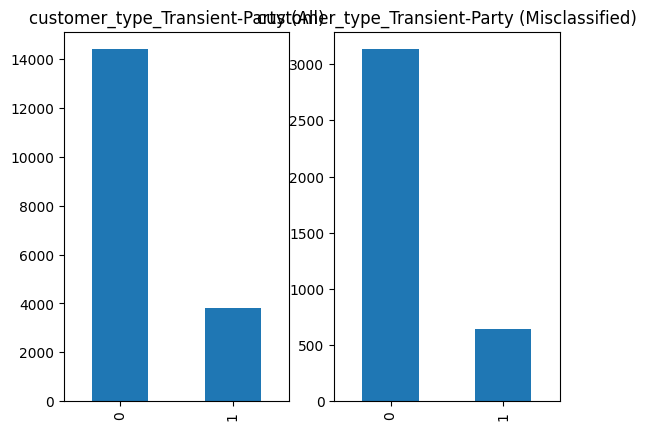

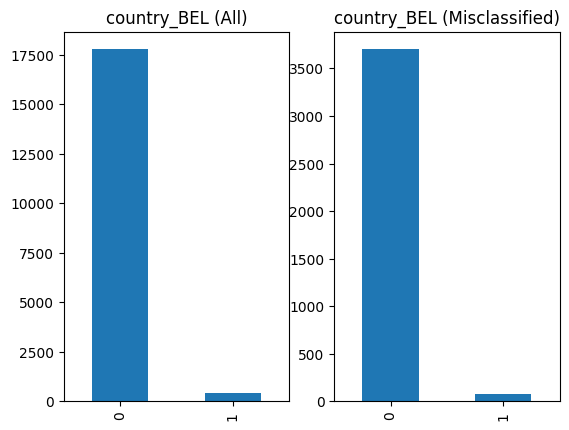

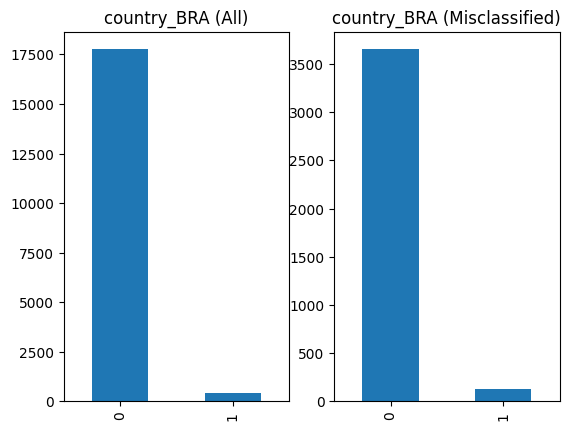

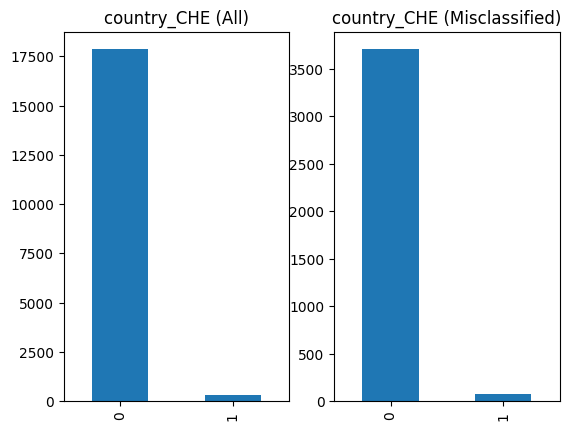

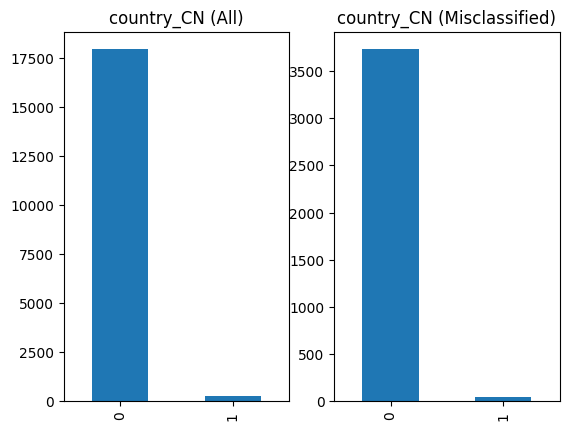

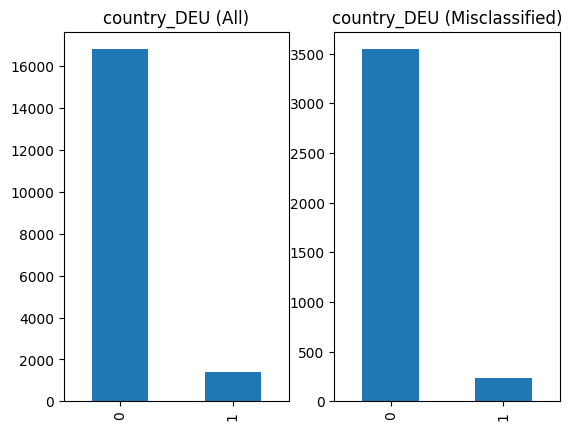

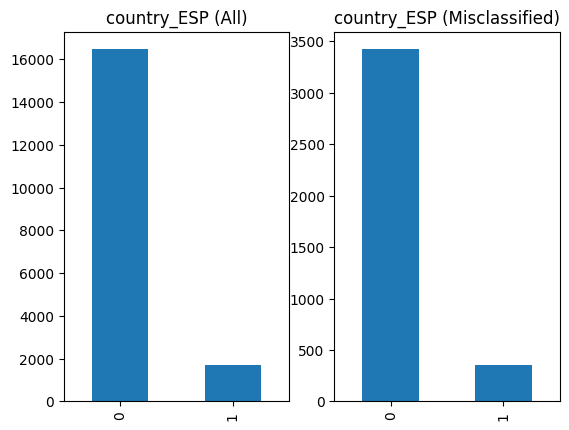

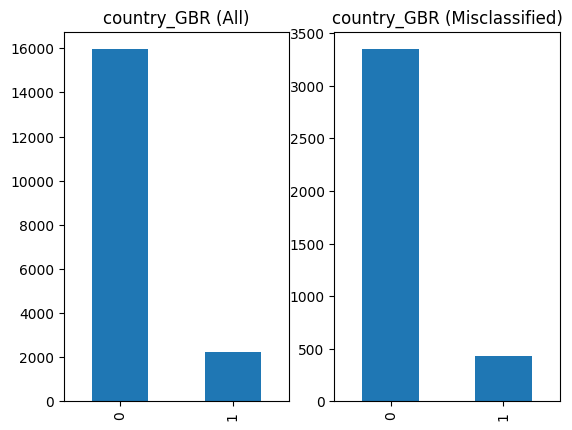

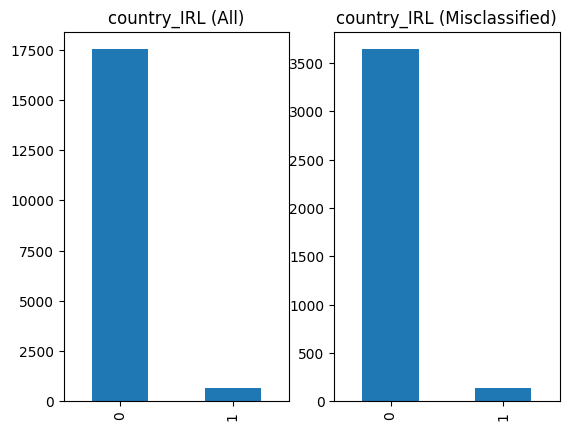

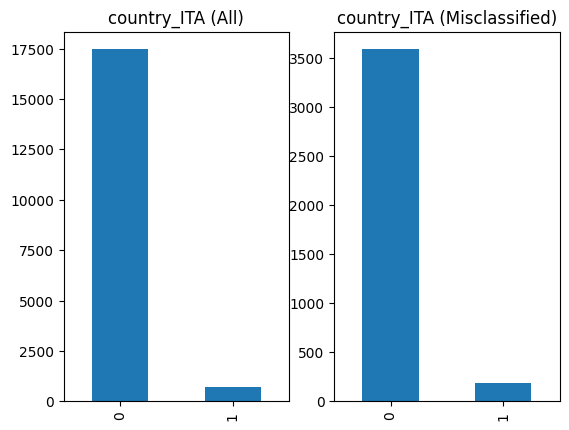

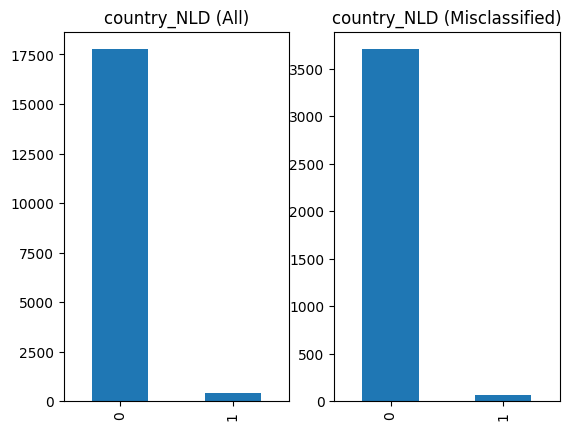

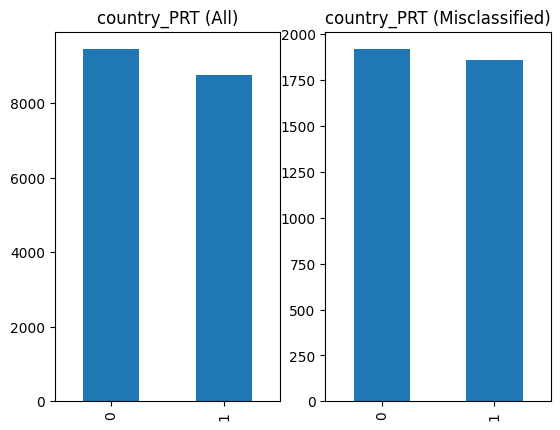

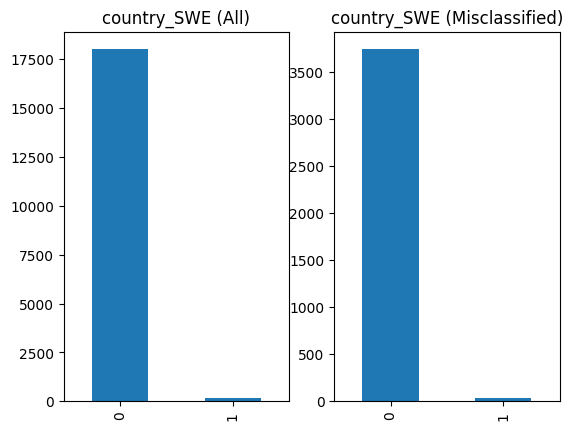

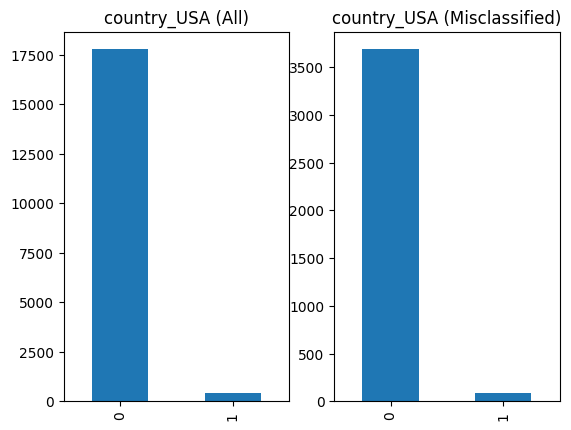

In [ ]:
for column in encoded_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  df_with_predictions[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (All)', ax=ax1)
  misclassified_df[column].value_counts(sort=False).sort_index().plot(kind='bar', title=f'{column} (Misclassified)', ax=ax2)

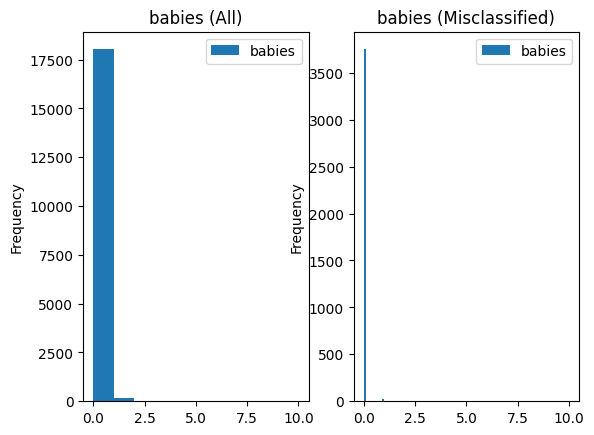

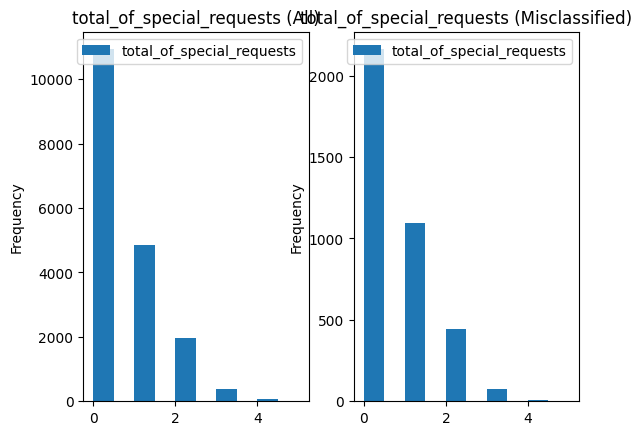

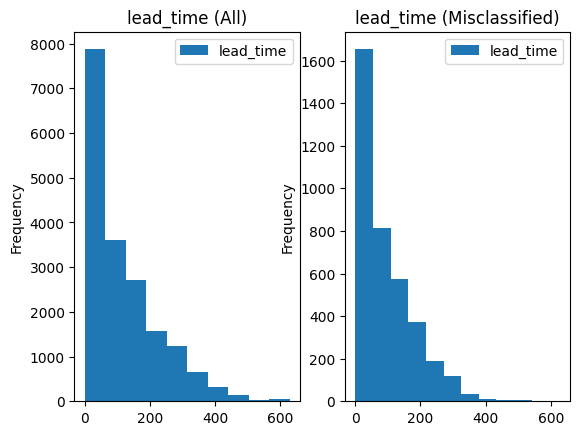

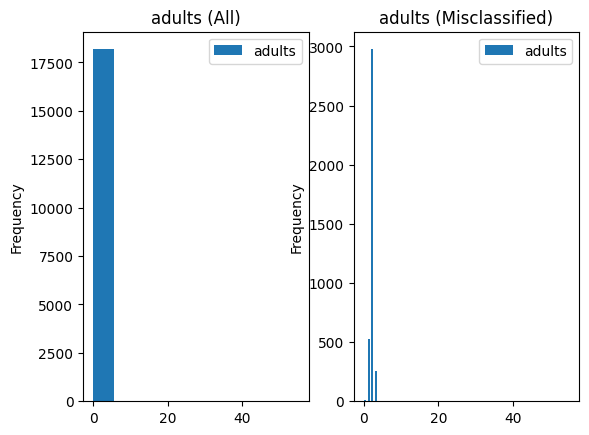

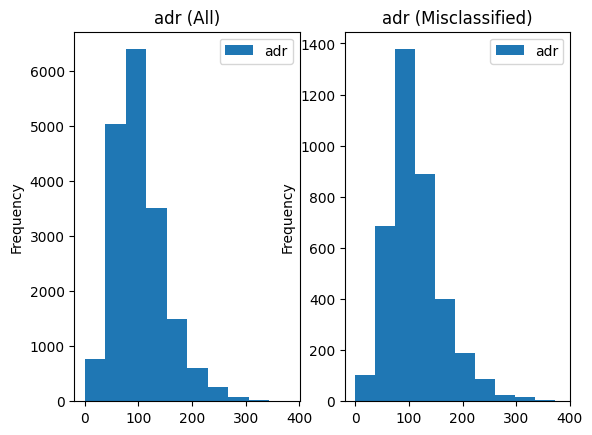

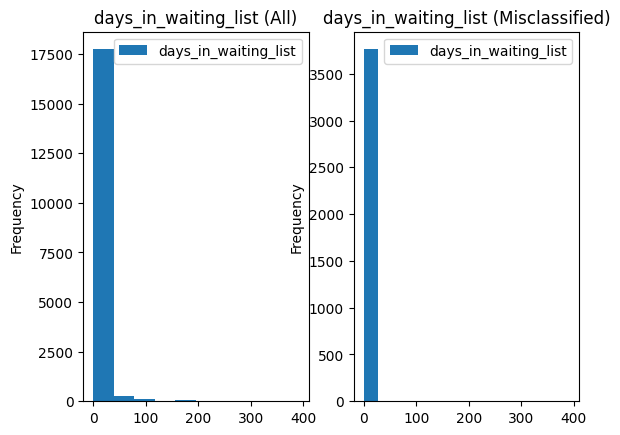

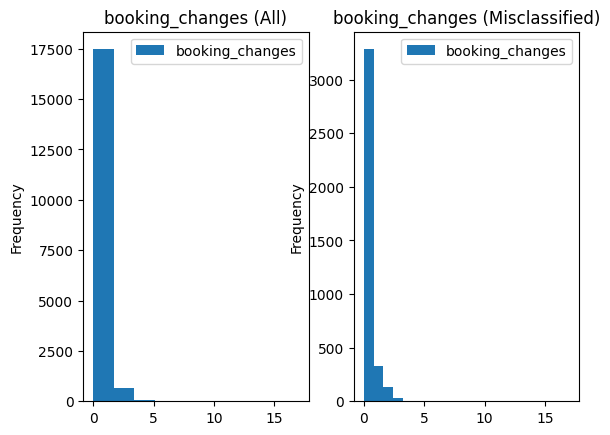

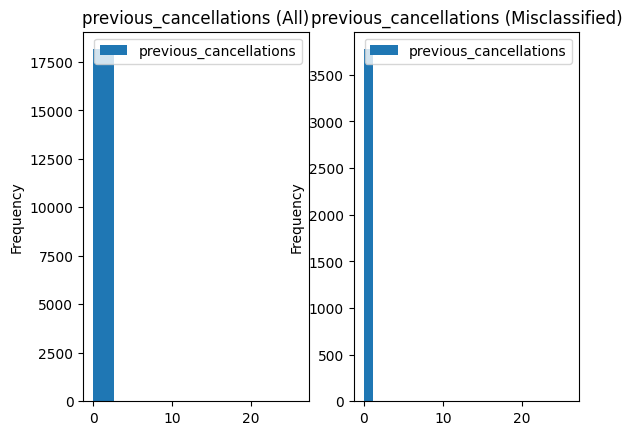

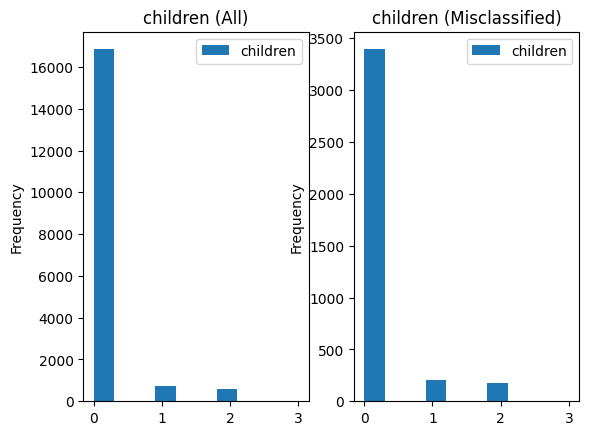

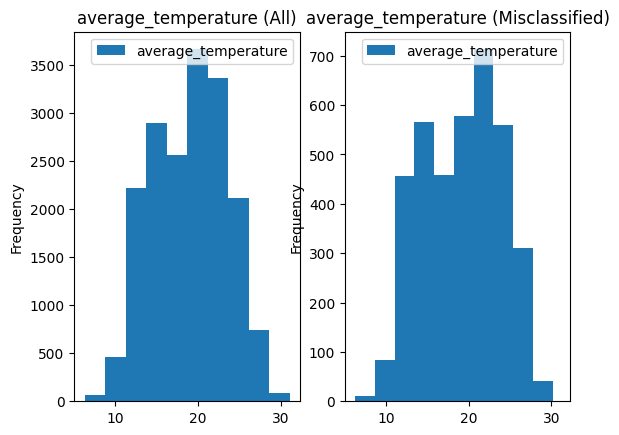

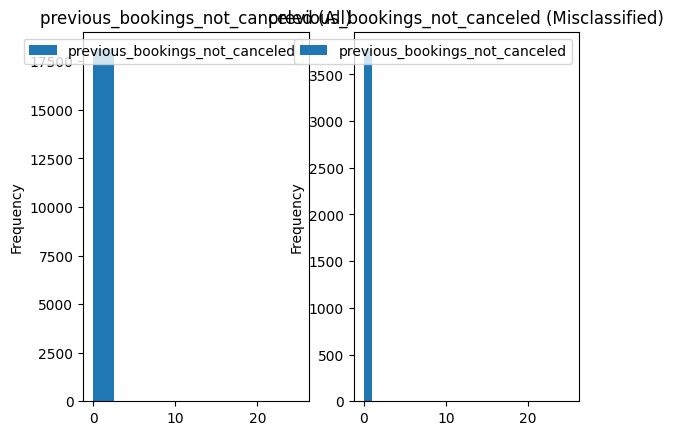

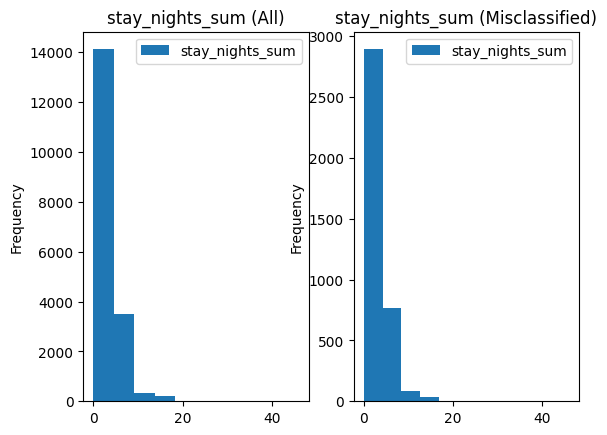

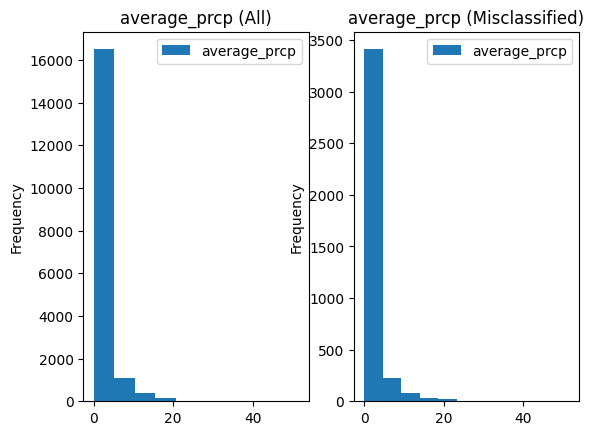

In [ ]:
for column in numerical_columns:
  fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
  df_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  misclassified_df.plot(kind='hist', y=column, title=f'{column} (Misclassified)', ax=ax2)

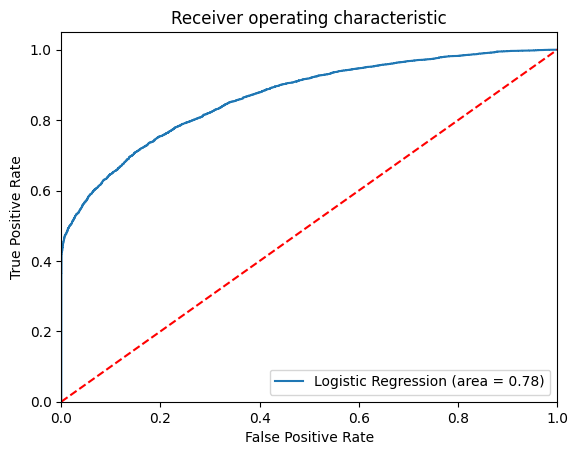

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test, logistic.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature Importance und Variablen-Reduktion

In [ ]:
# Get feature importance
feature_importance = abs(logistic.coef_[0])

# Create a DataFrame with feature importance
importance_df = pd.DataFrame({'Feature': X_scaled_smote.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the resulting DataFrame
print(importance_df)

                           Feature  Importance
9           previous_cancellations    2.979483
24         deposit_type_Non_Refund    1.637498
39                     country_PRT    0.954119
10  previous_bookings_not_canceled    0.772349
27         customer_type_Transient    0.525328
0                        lead_time    0.492740
20     distribution_channel_Direct    0.482376
15       total_of_special_requests    0.470954
1                arrival_date_year    0.305114
11                 booking_changes    0.260881
34                     country_ESP    0.242621
14                             adr    0.231795
37                     country_ITA    0.220247
19                     city_Lisbon    0.178969
30                     country_BRA    0.171321
4                  stay_nights_sum    0.164147
2               arrival_date_month    0.127238
22      distribution_channel_TA_TO    0.108884
16             average_temperature    0.101240
36                     country_IRL    0.101194
41           

In [ ]:
less_features_df = maindf_c.drop(columns=['average_prcp', 'babies', 'agent', 'days_in_waiting_list', 'children', 'holiday_flag', 'stay_nights_sum', 'adults', 'average_temperature', 'customer_type_Group', 'distribution_channel_Undefined', 'country_CN', 'deposit_type_Refundable', 'country_SWE', 'country_NLD', 'country_BEL', 'distribution_channel_GDS', 'country_DEU', 'country_CHE', 'customer_type_Transient-Party', 'country_GBR', 'country_USA'])

In [ ]:
new_X = less_features_df.drop(columns='is_canceled')
new_y = less_features_df.is_canceled

In [ ]:
new_X_scaled = less_features_df.drop(columns='is_canceled')
new_y_scaled = less_features_df.is_canceled

In [ ]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42, stratify = new_y, shuffle = True)
new_X_train_scaled, new_X_test_scaled, new_y_train_scaled, new_y_test_scaled = train_test_split(new_X_scaled, new_y_scaled, test_size=0.2, random_state=42, stratify = new_y_scaled, shuffle = True)

In [ ]:
new_smote = SMOTE(random_state=42)
new_X_smote, new_y_smote = smote.fit_resample(new_X_train,new_y_train)
new_X_scaled_smote, new_y_scaled_smote = smote.fit_resample(new_X_train_scaled,new_y_train_scaled)

In [ ]:
def new_evaluate(clf, new_X_test, new_y_true):
  new_y_pred = clf.predict(new_X_test)
  print(classification_report(new_y_true, new_y_pred))

In [ ]:
new_logistic = LogisticRegression(random_state=56)

In [ ]:
new_logistic.fit(new_X_scaled_smote, new_y_scaled_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=56)

In [ ]:
new_evaluate(new_logistic, new_X_test_scaled, new_y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     10670
           1       0.73      0.72      0.72      7513

    accuracy                           0.77     18183
   macro avg       0.77      0.77      0.77     18183
weighted avg       0.77      0.77      0.77     18183



In [ ]:
new_logistic.score(new_X_test_scaled, new_y_test_scaled)

0.7734697244679096

### Hyperparametertuning

In [ ]:
from scipy.stats import loguniform

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_scaled, y_scaled)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on your data
y_pred = best_model.predict(X_scaled)
print("Classification Report:")
print(classification_report(y_scaled, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
def hyper_evaluate(clf, X_test, y_true):
  hyper_y_pred = clf.predict(X_test)
  print(classification_report(y_true, hyper_y_pred))

Mit dem Parameter l2 wird die sogenannte L2-Regulierung angewandt und verringert so die Gefahr vor Overfitting stark, da die Komplexität des Modells reduziert wird und somit weniger anfällig für overfitting ist. Das Modell wird bestraft wenn es große Koeffizienten verwendet. Die Koeffizienten werden während des Trainingsprozesses kleiner gehalten.

In [ ]:
hyper_logistic = LogisticRegression(random_state=56, C=0.1, penalty='l2', solver='liblinear')

In [ ]:
hyper_logistic.fit(X_scaled_smote, y_scaled_smote)

In [ ]:
hyper_evaluate(hyper_logistic, X_test_scaled, y_test_scaled)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_scaled)


from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test_scaled, y_pred))

Accuracy: 0.8320883909119203


In [ ]:
evaluate(knn, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     11536
           1       0.81      0.76      0.78      7742

    accuracy                           0.83     19278
   macro avg       0.83      0.82      0.82     19278
weighted avg       0.83      0.83      0.83     19278



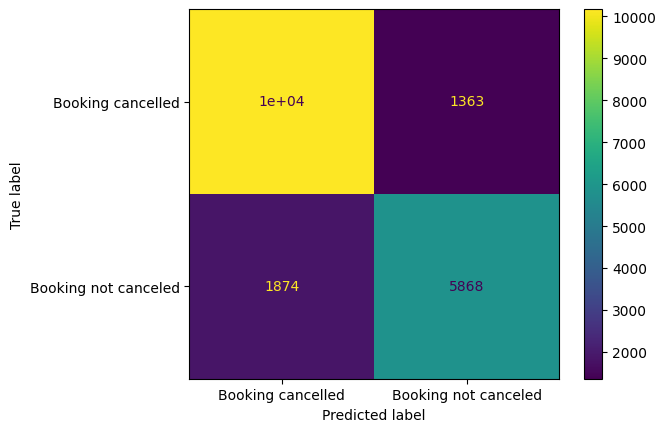

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Booking cancelled', 'Booking not canceled'])

## Hyperparametertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

ht = RandomizedSearchCV(knn, param_grid, random_state=42, n_iter=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train_scaled, y_train_scaled)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: ignored

In [ ]:
# find the best score
g_res.best_score_

In [ ]:
# get the hyperparameters with the best score
ht_params=g_res.best_params_
ht_params

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train_scaled, y_train_scaled)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train_scaled)
y_knn = knn.predict(X_test_scaled)

In [ ]:
evaluate(g_res, X_test_scaled, y_test_scaled)

# **Support Vector Machines**

https://www.inovex.de/de/blog/support-vector-machines-guide/

https://scikit-learn.org/stable/modules/svm.html
https://dataaspirant.com/svm-kernels/#t-1608140512020

SVC gar nicht gut für große Samples https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html, herausgefunden, nachdem lange gedauert und abgebrochen.

Support Vector Machines sind im Machine Learning weit verbreitete Algorithmen, insbesondere für Klassifikationsaufgaben. Dabei kann über den Parameter 'kernel' bestimmt werden, durch welche Funktionsform die Klassen gebildet werden (linear, rbf, polynomial). Für große Datenmengen, wie sie in unserem Fall vorliegen, eignen sich die Standard-SVCs leider nicht, wir benötigen die schnellere Implementierung, den LinearSVC. Dieser Classifier akzeptiert allerdings den Parameter 'kernel' nicht bzw. der Parameter muss nicht definiert werden.

Wir importieren den LinearSVC aus dem sklearn.svm-package, trainieren das Modell und evaluieren das gefittete Modell.

In [ ]:
# for LinearSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

# for predicting labels
from sklearn.metrics import accuracy_score, recall_score, precision_score

#for Hyperparameter Tuning
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

#for Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X, y = make_classification(n_features=4, random_state=42)
svc_clf = LinearSVC(random_state=42, tol=1e-5)

svc = svc_clf.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
y_svc_predict = svc_clf.predict(X_test_scaled)
y_svc_predict = y_svc_predict.reshape(-1,1)

In [ ]:
evaluate(svc, X_test_scaled,y_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     10670
           1       0.85      0.61      0.71      7513

    accuracy                           0.79     18183
   macro avg       0.81      0.77      0.78     18183
weighted avg       0.80      0.79      0.79     18183



Über die Confusion Matrix können wir nun darstellen, wie häufig bestimmte Werte predictet wurden und stellen diese den tatsächlich eingetretenen Fällen gegnüber.

In [ ]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test_scaled, y_svc_predict))

Confusion Matrix:
[[9839  831]
 [2900 4613]]


> true positive (TP) predictions

> true negative (TN) predictions

> false positive (FP) predictions

> false negative (FN) predictions

> The decision tree **correctly** predicted 11,617 instances as negative (TN) and 6,703 instances as positive (TP).

> The decision tree made 2,101 **false** positive predictions (FP) and 1,862 false negative predictions (FN).

Noch übersichtlicher werden die Ergebnisse der Confusion Matrix in einem Plot.

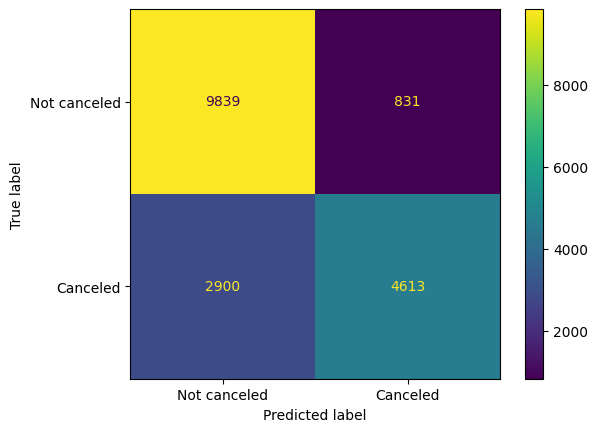

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    svc, X_test_scaled, y_test_scaled, labels=[0, 1], display_labels=['Not canceled', 'Canceled'])

## **Hyperparameter Tuning**

C: da LinearSVC: andere Parameter wie 'learning_rate' nicht valid.

Die Fehlermeldung "TypeError: Parameter grid for parameter 'C' is not iterable or a distribution (value=1)" deutet darauf hin, dass es ein Problem mit dem angegebenen Parameterraum für den Parameter 'C' gibt. Der Wert '1' allein ist nicht als Parameterraum gültig.

Um das Problem zu beheben, kannst du entweder einen spezifischen Wert oder einen Parameterraum für 'C' angeben. Hier sind zwei Möglichkeiten:

from scipy.stats import uniform

param_grid = {
    'C': uniform(loc=0.1, scale=10),

    Die Wahl zwischen der Verwendung spezifischer Werte und der Verwendung eines Parameterraums hat Vor- und Nachteile, die ich im Folgenden erläutern werde:

Option 1: Spezifische Werte für 'C':
Vorteile:

Einfachheit: Die Verwendung spezifischer Werte ist einfach und erfordert keine weiteren Berechnungen.
Kontrolle: Du hast direkte Kontrolle über die ausgewählten Werte für 'C' und kannst gezielt bestimmte Werte testen.
Nachteile:

Möglicher Informationsverlust: Es besteht die Möglichkeit, dass der optimale Wert für 'C' nicht in den spezifischen Werten enthalten ist. Dies kann dazu führen, dass das Tuning nicht das bestmögliche Ergebnis erzielt.
Option 2: Parameterraum für 'C':
Vorteile:

Flexibilität: Durch die Verwendung eines Parameterraums kannst du einen breiteren Bereich von 'C'-Werten abdecken und somit eine größere Chance haben, den optimalen Wert zu finden.
Automatisierte Suche: Der Hyperparameter-Tuning-Algorithmus (z. B. RandomizedSearchCV) kann den Parameterraum automatisch durchsuchen und die besten Kombinationen finden.
Nachteile:

Komplexität: Die Definition eines Parameterraums erfordert möglicherweise zusätzliche Überlegungen und Kenntnisse über die Wertebereiche von 'C'. Die Auswahl eines geeigneten Parameterraums kann eine gewisse Erfahrung oder Experimentation erfordern.
Berechnungsaufwand: Ein breiterer Parameterraum kann zu einer erhöhten Rechenzeit führen, da der Hyperparameter-Tuning-Algorithmus mehr Kombinationen ausprobieren muss.
Es ist wichtig zu beachten, dass die Vor- und Nachteile von Optionen wie spezifischen Werten oder Parameterräumen stark vom Anwendungsfall und den Eigenschaften des Modells abhängen können. Es empfiehlt sich, verschiedene Optionen auszuprobieren und die Auswirkungen auf die Leistung des Modells zu beobachten, um die besten Hyperparameter-Tuning-Strategien zu ermitteln.



In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'dual': [True, False],
    'fit_intercept': [True, False],
    'intercept_scaling': loguniform(0.1, 10),
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000],
    'penalty': ['l1', 'l2'],
    'tol': loguniform(0.0001, 0.1),
    'verbose': [0, 1]
}

In [ ]:
ht_svc = RandomizedSearchCV(svc_clf, param_grid, random_state=42, n_iter=10)

In [ ]:
ht_svc.fit(X_train_scaled, y_train_scaled)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty,

[LibLinear]

RandomizedSearchCV(estimator=LinearSVC(random_state=42, tol=1e-05),
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [True, False],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7efcf934bf40>,
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2'],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7efcf9411f60>,
                                        'verbose': [0, 1]},
                   random_state=42)

Trotz Hyperparameter Tuning richtig schlechte Accuracy => nicht geeignet

In [ ]:
ht_svc.best_params_

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.593052261624101,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'penalty': 'l2',
 'tol': 0.00014765043713594345,
 'verbose': 1}

In [ ]:
evaluate(ht_svc, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     10670
           1       0.85      0.61      0.71      7513

    accuracy                           0.79     18183
   macro avg       0.81      0.77      0.78     18183
weighted avg       0.80      0.79      0.79     18183



# **Gradient Boosting**



> Als nächstes Modell testen wir das additive Ensemble-Modell 'Gradient Boosting'. Hierbei werden schwächere Lernmodelle, i. d. R. Entscheindungsbäume schrittweise hinzugefügt und somit zu einem starken Lernmodell kombiniert. Im Gegensatz zum Random Forest werden beim Gradient Boosting gezielt schwache, fehlerhafte Lernmodelle genutzt, um diese zu kombinieren und Schwachstellen auszugleichen. Schritt für Schritt wird ein neues schwaches Lernmodell hinzugezogen und die Fehler korrigiert.

https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting




> Für Gradient Boosting benötigen wir den GradientBoostingClassifier. Der Parameter 'n_estimators' des Classifiers beschreibt dabei die Anzahl an schwächeren Lernmodellen, die sukzessive ins Trainingsmodell mitaufgenommen werden. DIe 'learning_rate' gibt den Hyperparameter sn, durch den Overfitting vermieden werden soll, der also das gesamte Modell reguliert. die Größe des decision trees wird durch 'max_depth' definiert. Über den Hyperparameter 'random_state' wird bestimmt, dass train- und test-Daten immer die selben Werte annehmen und somit das Machine Learning Modell immer die gleichen Ergebnisse liefert.



> Um GradientBossting als Classification durchführen zu können, müssen wir erstmal den gradientBoostingClassifier aus sklearn.ensemble importieren.



In [ ]:
from numpy import loadtxt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

Wir bestimmen die Parameter n_estimators, learning_rate und max_depth entsprechend der Python-Dokumentation und bestimmen einen random_state, um immer gleiche Ergebnisse mit Training und Evaluation zu erhalten.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)

In [ ]:
gb.fit(X_train_scaled, y_train_scaled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

Das trainierte Modell kann evaluiert werden. Wir sehen, dass die Accuracy bei 82% liegt, der f1-Score liegt knapp darunter, bei %.

In [ ]:
evaluate(gb, X_test_scaled, y_test_scaled)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     10670
           1       0.84      0.68      0.75      7513

    accuracy                           0.82     18183
   macro avg       0.82      0.80      0.80     18183
weighted avg       0.82      0.82      0.81     18183



## **Hyperparameter Tuning**

AUS SKRIPT

In [ ]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': loguniform(0.001, 1),
    'n_estimators': [50, 100, 200, 220, 250],
    'subsample': [0.3, 0.5, 0.8, 1.0],
    'max_depth': [3, 5, 7, 11],
    'min_samples_split': [1, 2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

https://colab.research.google.com/drive/1alinCu_hm_69JQRA_jPoCB_PY3xnE7Br#scrollTo=2qVTsJxtk5Xg&line=4&uniqifier=1

In [ ]:
ht_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=42, n_iter=10)

In [ ]:
ht_gb.fit(X_train_scaled, y_train_scaled)

In [ ]:
ht_gb.best_params_

Ein bisschen nochmal verbessert. Ist i.O.

In [ ]:
evaluate(ht_gb, X_test_scaled, y_test_scaled)

# **XGBoost**

Das XGBoost-Modell ist eine spezielle Implementierung der Ensemble-Methode 'GradientBoosting', die sehr viele Etnscheidungsbäume trainiert, schrittweise miteinander kombiniert und durch Fehlerbeseitung der hinzugefügten Modelle optimiert. XGBoost steht dabei für 'Extreme Gradient Boosting', das optimierte Trainingsalgorithmen verwendet, Gradientenabstieg und Regularisierungstechniken kombiniert, um Overfitting zu reduzieren und ein leistungsstarkes, effizientes Gradient Bossting Modell zu bieten.
XGBoost hat sich daher besonders für Klassifikationen im Bereich Data Science bewährt, in dem große Datenmengen verarbeitet werden.

Ein Vorteil des XGBoost-Modells ist, dass im Gegensatz zu anderen Gradient Boosting-Implementierungen Regularisierungstechniken (L1- und L2-Regularisierung) integriert sind, sodass Overfitting reduziert und die Modellkomplexität gesteuert werden kann. Außerdem kann das Modell durch viele Parameter flexibel gestaltet werden und sich so an das Problem anpassen. Zuletzt punktet XGBoost auch mit guter Akalierbarkeit, was sich besonders für große Datensätze und viele Features - und somit für unseren Fall - gut eignet.

XGBoost performt meist sehr gut und erzielt eine hohe Accuracy.

Für die Implementierung importieren wir den XGBClassifier aus dem package 'xgboost' und definieren die Parameter 'objective', 'alpha' (Hyperparameter für die Stärke der L1-Regularisierung) und lambda (L2-Regularisierung). Danach kann das Modell trainiert und als Entscheidungsbaum geplottet werden.

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

params = {
    'objective': 'binary:logistic',
    'alpha': 0.5,    # L1-Regularisierung
    'lambda': 0.5    # L2-Regularisierung
}

xgb = XGBClassifier(**params)
xgb.fit(X_train_scaled, y_train_scaled)

plot_tree(xgb)
plt.show()

alpha (L1-Regularisierung): Der Hyperparameter alpha steuert die Stärke der L1-Regularisierung. Ein höherer Wert von alpha führt zu einer stärkeren Regularisierung und reduziert die Anzahl der Merkmale im Modell. Standardmäßig ist alpha=0, was bedeutet, dass keine L1-Regularisierung angewendet wird.

lambda (L2-Regularisierung): Der Hyperparameter lambda steuert die Stärke der L2-Regularisierung. Ein höherer Wert von lambda führt zu einer stärkeren Regularisierung und reduziert die Größe der Modellkoeffizienten. Standardmäßig ist lambda=1, was bedeutet, dass eine leichte L2-Regularisierung angewendet wird.

Zuletzt schauen wir uns die Evaluationswerte Accuracy und f1-score an. XGBoost performt im Vergleich zu GradientBoosting deutlich besser.

In [ ]:
evaluate(xgb, X_test_scaled, y_test_scaled)

## **Hyperparameter Tuning**

Wir versuchen nun durch Hyperparameter Tuning die

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # Lernrate
    'max_depth': [3, 5, 6, 10],  # Maximale Tiefe der Bäume
    'n_estimators': [50, 100, 200],  # Anzahl der Bäume
    #'subsample': [0.5, 0.8, 1.0],  # Stichprobengröße für jeden Baum
    'min_child_weight': [1, 5, 10, 100],  # Mindestgewicht der Beispiele in einem Blatt
    'lambda' : [1,0.5],
    'alpha': [0.5,0],
    'seed': [42]
}

# RandomizedSearchCV initialisieren
ht_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, cv=5)

# Hyperparameter-Tuning durchführen
ht_xgb.fit(X_train_scaled, y_train_scaled)

In [ ]:
ht_xgb.best_params_

In [ ]:
# IMPORTANT NOTE: hyperparameter tuning with cv can lead to slightly worse results.
# This is fine, because the generalization error of the model won't increase through cv.

In [ ]:
evaluate(ht_xgb, X_test_scaled, y_test_scaled)